In [491]:
pip install missingno


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [492]:
pip install pandas_profiling


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [493]:
pip install yellowbrick


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [494]:
pip install shap


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [495]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from pandas_profiling import ProfileReport
from pathlib import Path
from sklearn.metrics import mean_squared_error
from scipy import stats
from yellowbrick.model_selection import FeatureImportances
import shap
import joblib
%matplotlib inline

In [496]:
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')

In [497]:
train_original.shape

(30000, 23)

In [498]:
test_original.shape

(20000, 23)

In [499]:
train_original.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Property ID', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

In [500]:
test_original.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price'],
      dtype='object')

In [501]:
pd.set_option('display.max_columns', None)
train_original.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56      1933.050              Low   
1     C-33999  America Calderone      M   32      4952.910              Low   
2      C-3770      Rosetta Verne      F   65       988.190             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31      2614.770              Low   

  Profession     Type of Employment    Location  Current Loan Expenses (USD)  \
0    Working            Sales staff  Semi-Urban                      241.080   
1    Working                    NaN  Semi-Urban                      495.810   
2  Pensioner                    NaN  Semi-Urban                      171.950   
3  Pensioner                    NaN       Rural                      298.540   
4    Working  High skill tech staff  Semi-Urban                      491.410   

  Expense Type 1 Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              N              N       3.000       809.440                0   
1              N              Y       1.000       780.400                0   
2              N              Y       1.000       833.150                0   
3              N              Y       2.000       832.700                1   
4              N              Y         NaN       745.550                1   

  Has Active Credit Card  Property ID  Property Age  Property Type  \
0                    NaN          746      1933.050              4   
1            Unpossessed          608      4952.910              2   
2            Unpossessed          546       988.190              2   
3            Unpossessed          890           NaN              2   
4                 Active          715      2614.770              4   

  Property Location  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0             Rural             1      119933.460                   54607.180  
1             Rural             1       54791.000                   37469.980  
2             Urban             0       72440.580                   36474.430  
3        Semi-Urban             1      121441.510                   56040.540  
4        Semi-Urban             1      208567.910                   74008.280

In [502]:
test_original.head()

Customer ID              Name Gender  Age  Income (USD) Income Stability  \
0     C-26247  Tandra Olszewski      F   47      3472.690              Low   
1     C-35067     Jeannette Cha      F   57      1184.840              Low   
2     C-34590      Keva Godfrey      F   52      1266.270              Low   
3     C-16668      Elva Sackett      M   65      1369.720             High   
4     C-12196    Sade Constable      F   60      1939.230             High   

             Profession Type of Employment    Location  \
0  Commercial associate           Managers  Semi-Urban   
1               Working        Sales staff       Rural   
2               Working                NaN  Semi-Urban   
3             Pensioner                NaN       Rural   
4             Pensioner                NaN       Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                 137088.980                      396.720              N   
1                 104771.590                      463.760              Y   
2                 176684.910                      493.150              N   
3                  97009.180                      446.150              N   
4                 109980.000                      370.100              N   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              N       2.000       799.140                0   
1              Y       2.000       833.310                0   
2              Y       3.000       627.440                0   
3              Y       2.000       833.200                0   
4              N         NaN           NaN                0   

  Has Active Credit Card  Property ID  Property Age  Property Type  \
0            Unpossessed          843      3472.690              2   
1            Unpossessed           22      1184.840              1   
2            Unpossessed            1      1266.270              1   
3               Inactive          730      1369.720              1   
4                    NaN          356      1939.230              4   

  Property Location Co-Applicant Property Price  
0             Urban            1       236644.5  
1             Rural            1       142357.3  
2             Urban            1      300991.24  
3        Semi-Urban            0       125612.1  
4        Semi-Urban            1       180908.0

In [503]:
full_data = train_original

In [504]:
full_data.shape

(30000, 23)

In [505]:
# split the data into train and test
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [506]:
loan_amt_train_original, loan_amt_test_original = data_split(full_data, 0.35)

In [507]:
loan_amt_train_copy, loan_amt_test_copy = loan_amt_train_original.copy(), loan_amt_test_original.copy()

In [508]:
loan_amt_train_copy.shape

(19500, 23)

In [509]:

loan_amt_test_copy.shape

(10500, 23)

In [510]:
loan_amt_train_copy.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36900    Evelyne Zeitler      F   40      1434.670              Low   
1     C-13324      Marvella Egli      F   24           NaN              Low   
2     C-45055  Antonietta Dundon      M   26      1540.220              Low   
3      C-9142      Gertrud Krogh      F   37      1264.580              Low   
4     C-24998       Kenny Conine      F   23      1584.470              Low   

             Profession     Type of Employment    Location  \
0               Working               Laborers       Rural   
1               Working          Cooking staff       Rural   
2  Commercial associate         Cleaning staff  Semi-Urban   
3               Working            Sales staff  Semi-Urban   
4               Working  Private service staff  Semi-Urban   

   Current Loan Expenses (USD) Expense Type 1 Expense Type 2  Dependents  \
0                      773.930              N              N       3.000   
1                      150.030              N              Y         NaN   
2                      416.670              N              N       2.000   
3                      415.550              Y              Y       3.000   
4                      259.220              N              Y       3.000   

   Credit Score  No. of Defaults Has Active Credit Card  Property ID  \
0       720.490                0               Inactive          330   
1       651.490                0            Unpossessed          307   
2       757.880                1               Inactive          125   
3       802.340                0                 Active          435   
4       731.180                0            Unpossessed          910   

   Property Age  Property Type Property Location  Co-Applicant  \
0      1434.670              1             Rural             1   
1           NaN              1               NaN             1   
2      1540.220              2        Semi-Urban             1   
3      1264.580              2             Rural             1   
4      1584.470              4        Semi-Urban             1   

   Property Price  Loan Sanction Amount (USD)  
0      243151.290                  118772.970  
1       54541.370                   18922.750  
2      144156.070                       0.000  
3      138527.790                   59269.010  
4       66852.760                   31692.140

In [511]:
loan_amt_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  19500 non-null  object 
 1   Name                         19500 non-null  object 
 2   Gender                       19461 non-null  object 
 3   Age                          19500 non-null  int64  
 4   Income (USD)                 16526 non-null  float64
 5   Income Stability             18468 non-null  object 
 6   Profession                   19500 non-null  object 
 7   Type of Employment           14761 non-null  object 
 8   Location                     19500 non-null  object 
 9   Current Loan Expenses (USD)  19396 non-null  float64
 10  Expense Type 1               19500 non-null  object 
 11  Expense Type 2               19500 non-null  object 
 12  Dependents                   17885 non-null  float64
 13  Credit Score    

In [512]:
loan_amt_train_copy.describe()

Age  Income (USD)  Current Loan Expenses (USD)  Dependents  \
count 19500.000     16526.000                    19396.000   17885.000   
mean     40.087      2551.856                      400.122       2.253   
std      16.086      1745.404                      241.713       0.950   
min      18.000       378.760                     -999.000       1.000   
25%      25.000      1649.420                      248.167       2.000   
50%      40.000      2217.385                      374.795       2.000   
75%      55.000      3090.477                      520.963       3.000   
max      65.000    122966.280                     3025.400      10.000   

       Credit Score  No. of Defaults  Property ID  Property Age  \
count     18387.000        19500.000    19500.000     16366.000   
mean        739.578            0.193      501.856      2552.644   
std          72.369            0.395      288.383      1746.980   
min         580.000            0.000        1.000       378.760   
25%         680.665            0.000      251.000      1650.345   
50%         739.650            0.000      502.000      2221.010   
75%         799.215            0.000      751.000      3091.620   
max         896.260            1.000      999.000    122966.280   

       Property Type  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
count      19500.000     19500.000       19500.000                   19268.000  
mean           2.470        -4.274      131933.258                   47577.797  
std            1.120        71.420       93678.679                   48296.582  
min            1.000      -999.000        -999.000                    -999.000  
25%            1.000         1.000       60658.740                       0.000  
50%            2.000         1.000      110305.925                   35013.020  
75%            3.000         1.000      178974.645                   74079.872  
max            4.000         1.000     1077966.730                  395368.740

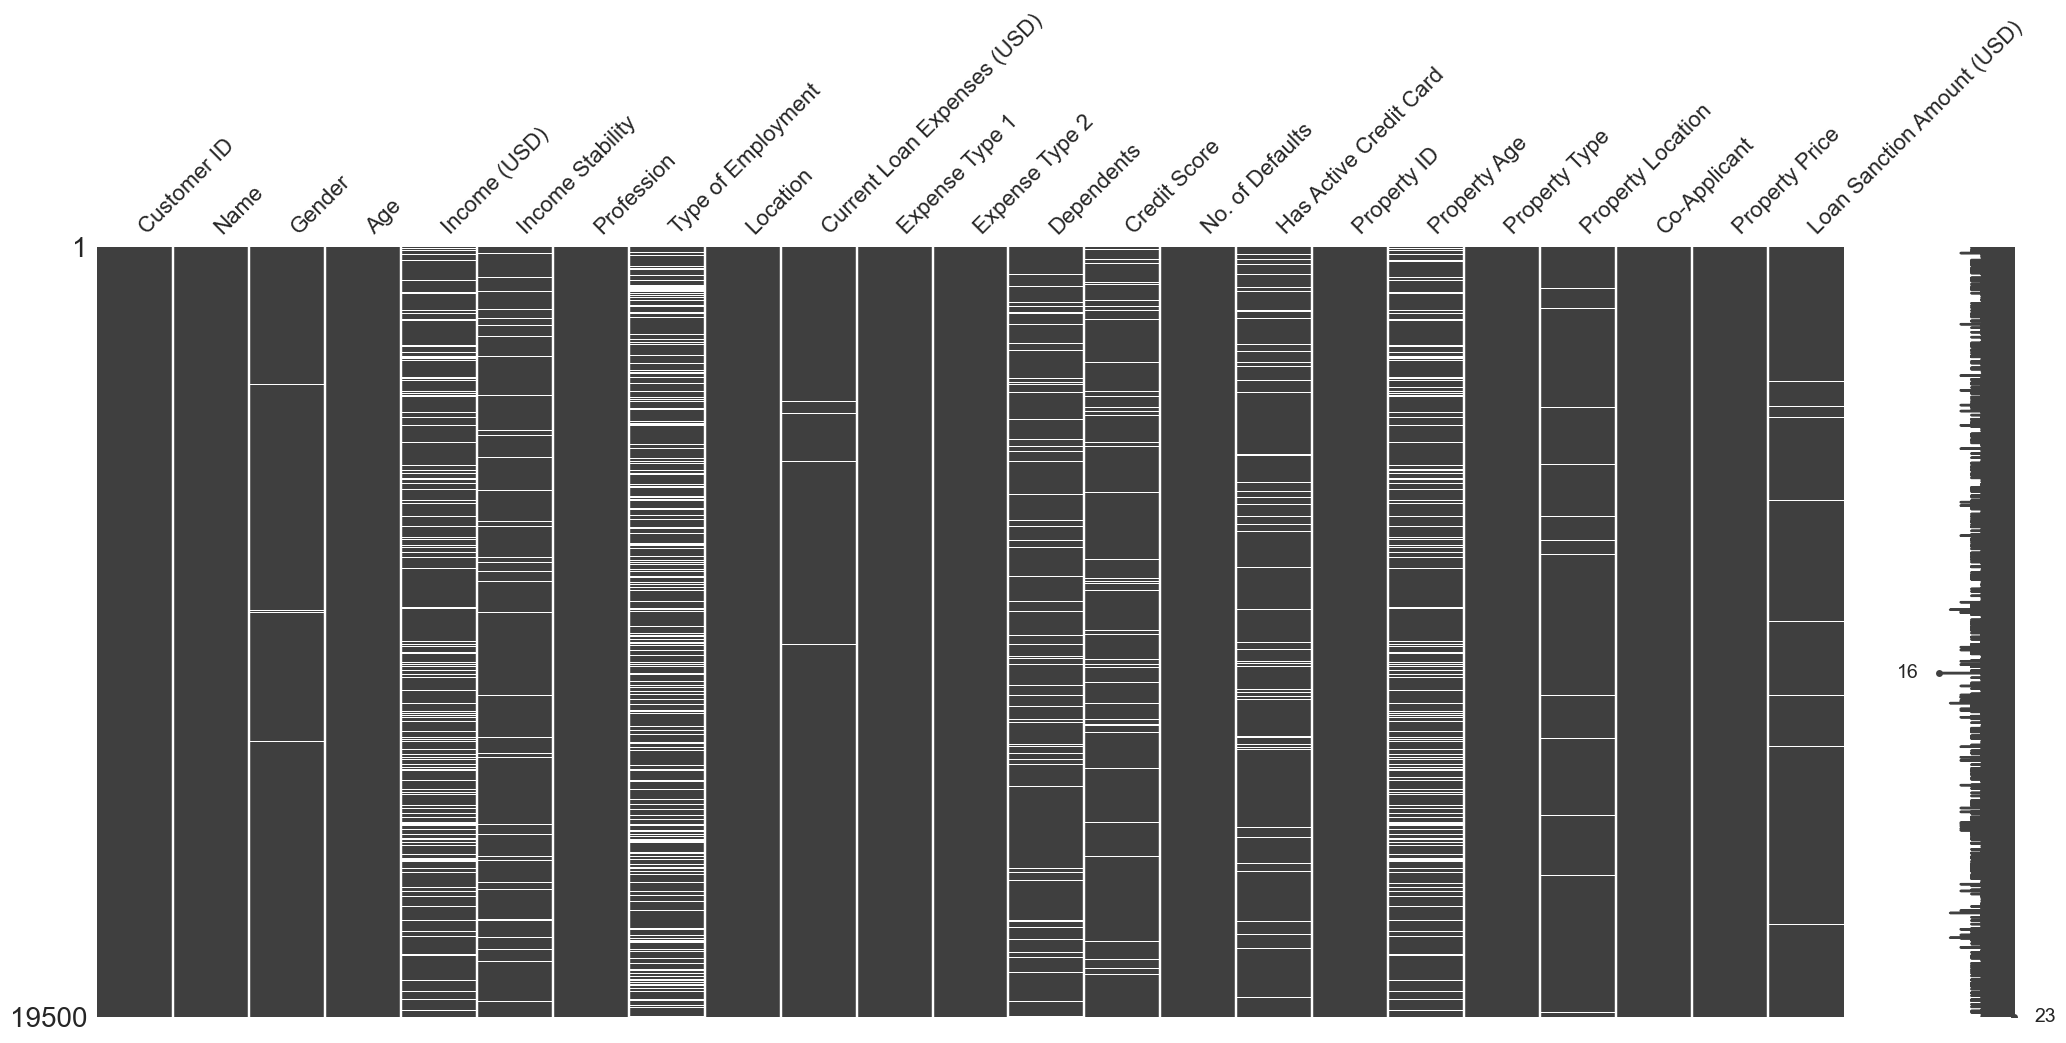

In [513]:
msno.matrix(loan_amt_train_copy)
plt.show()

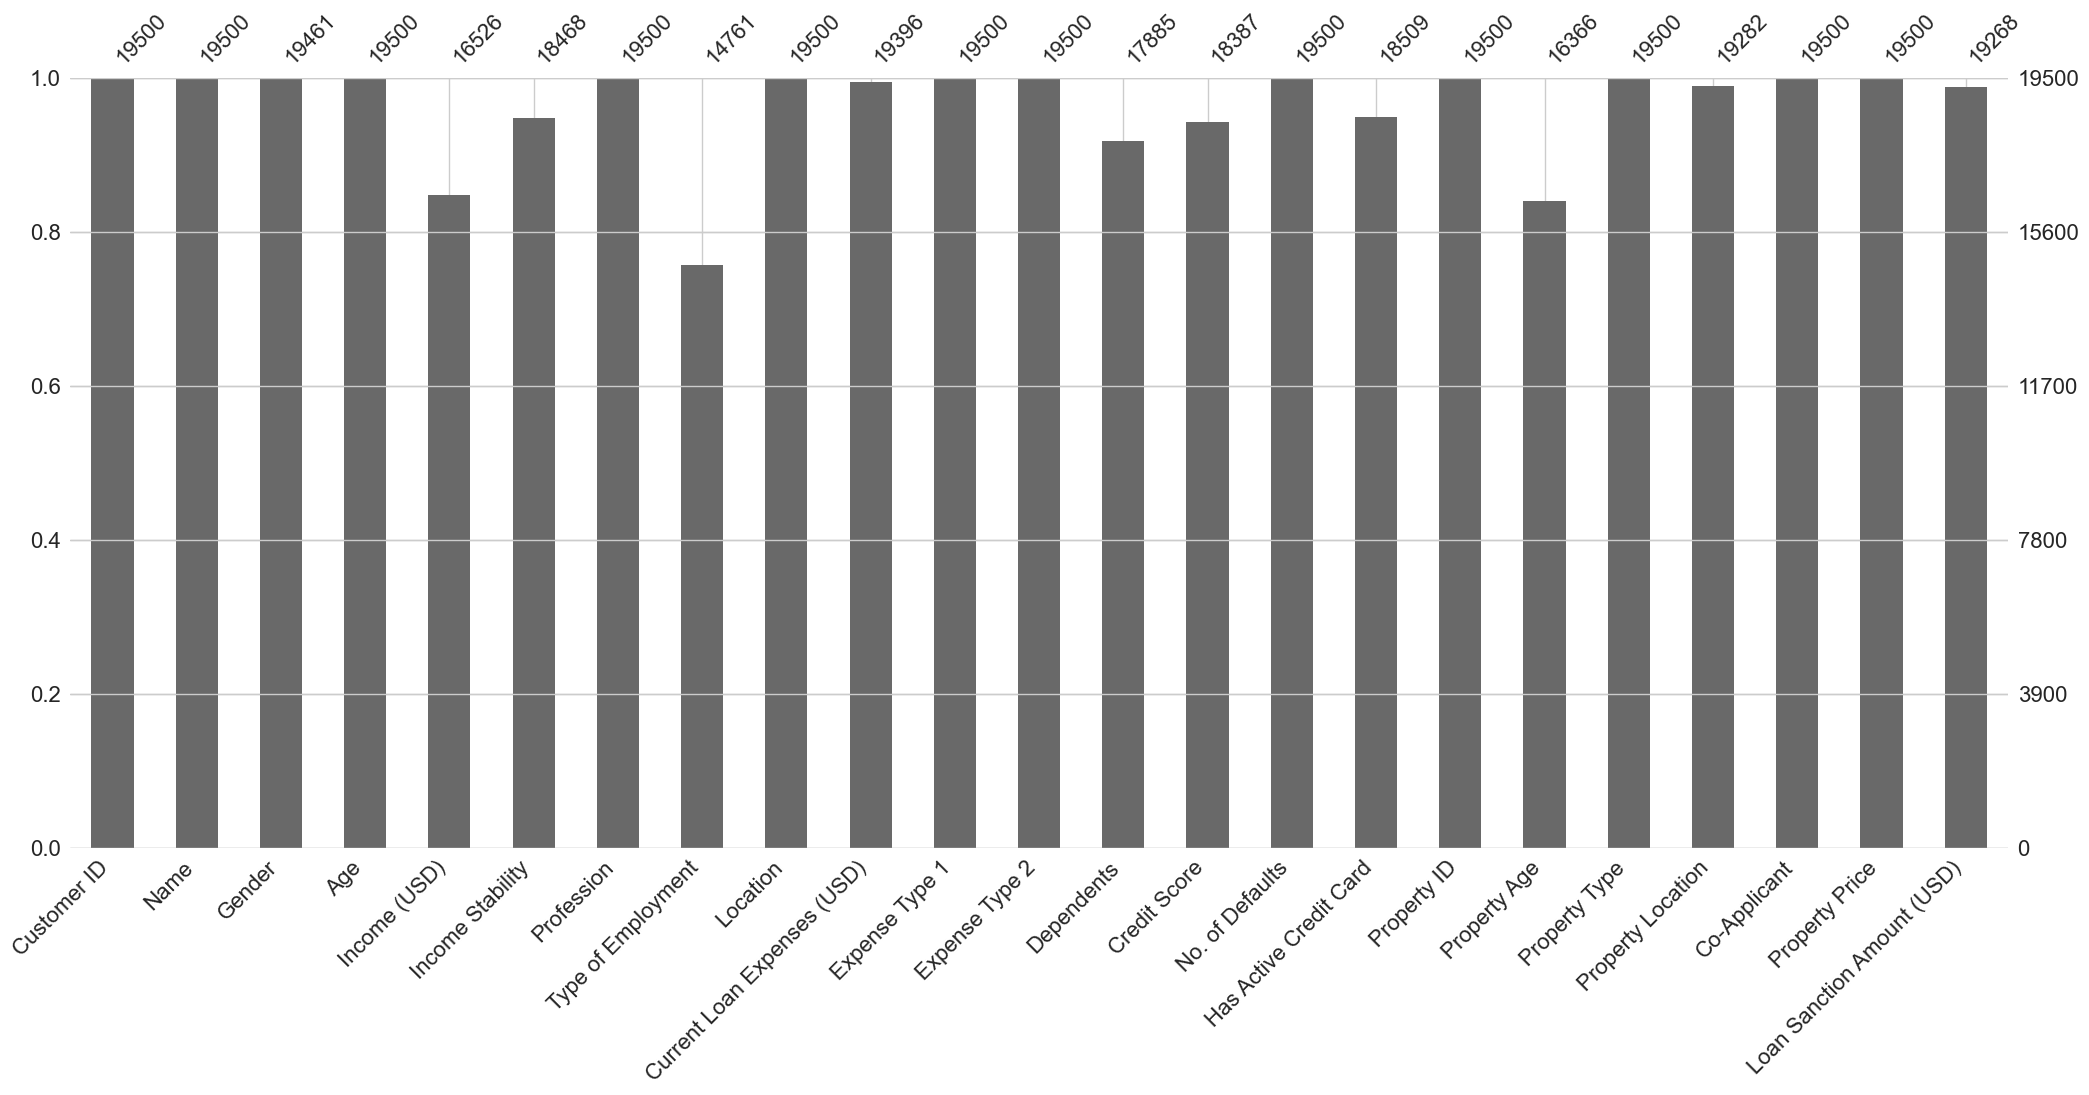

In [514]:
msno.bar(loan_amt_train_copy)
plt.show()

In [515]:
def value_cnt_norm_cal(df,feature):
    '''
    Function that will return the value count and frequency of each observation within a feature
    '''
    ftr_value_cnt = df[feature].value_counts()
    # normalize the value count
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [516]:
def gen_info_feat(df,feature):
    '''
    function to create display general information about the feature
    '''
    match feature:
        case 'Age' | 'Income (USD)' | 'Loan Amount Request (USD)' | 'Current Loan Expenses (USD)' | 'Credit Score' | 'Property Price' | 'Loan Sanction Amount (USD)':
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case 'Property Age':
            print('Description:\n{}'.format(df[feature].describe()/365.25))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case _:
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_cnt_norm_cal(df,feature)
            print('Value count:\n{}'.format(value_cnt))

In [517]:
def create_bar_plot(df,feature):
    '''
    function to create a bar chart plot
    '''
    match feature:
        case 'Profession' | 'Type of Employment' | 'Dependents':
            fig, ax = plt.subplots(figsize=(8,10))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0], color='dimgray')
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.xticks(rotation=45,ha='right')
            plt.title('{} count'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(6,10))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.xticks(rotation=45,ha='right')
            plt.title('{} count'.format(feature))
            return plt.show()

In [518]:
def create_donnut_pie_chart(df,feature):
    '''
    function to create a donnut pie chart
    '''
    ratio_size = value_cnt_norm_cal(df, feature)
    ratio_size_len = len(ratio_size.index)
    ratio_list = []
    for i in range(ratio_size_len):
        ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
    fig, ax = plt.subplots(figsize=(8,8))
    # %1.2f%% display decimals in the pie chart with 2 decimal places
    plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
    plt.title('Pie chart of {}'.format(feature))
    plt.legend(loc='best')
    plt.axis('equal')
    # add a circle at the center to transform it in a donut chart
    circle=plt.Circle( (0,0), 0.8, color='white')
    p=plt.gcf()
    p.gca().add_artist(circle)
    return plt.show()

In [519]:
def create_box_plot(df,feature):
    '''
    function to create a box plot
    '''
    match feature:
        case 'Property Age':
            fig, ax = plt.subplots(figsize=(2, 8))
            sns.boxplot(y=df[feature]/365.25)
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()

In [520]:
def create_hist_plot(df,feature, the_bins=50):
    '''
    function to create a histogram plot
    '''
    match feature:
        case 'Property Age':
            fig, ax = plt.subplots(figsize=(18, 10))
            sns.histplot(df[feature]/365.25, bins=the_bins, kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()

In [521]:
def missing_val_norm(df,feature):
    feat_nan_count = df[feature].isnull().sum()
    rows_count = df.shape[0]
    return 'The percentage of missing rows is {:.2f} %'.format(feat_nan_count * 100 / rows_count)

In [522]:
gen_info_feat(loan_amt_train_copy,'Gender')

Description:
count     19461
unique        2
top           M
freq       9815
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
M   9815         50.434
F   9646         49.566


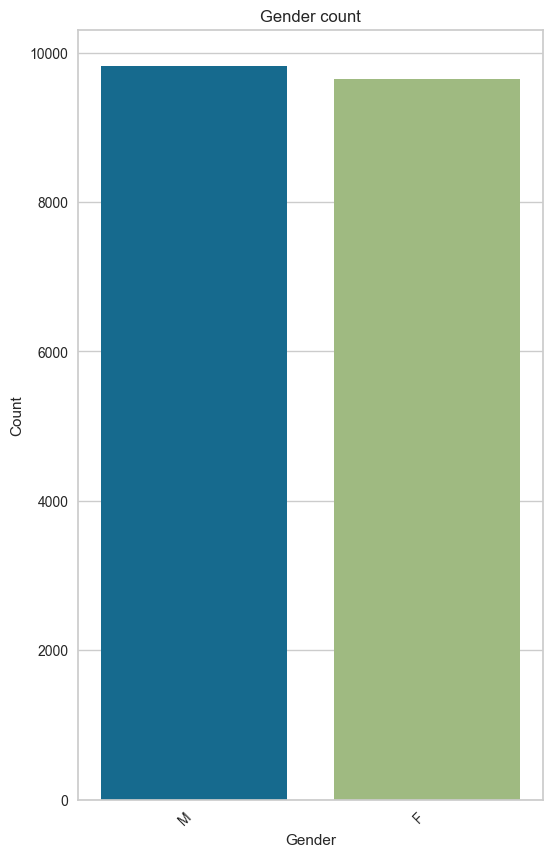

In [523]:
create_bar_plot(loan_amt_train_copy,'Gender')

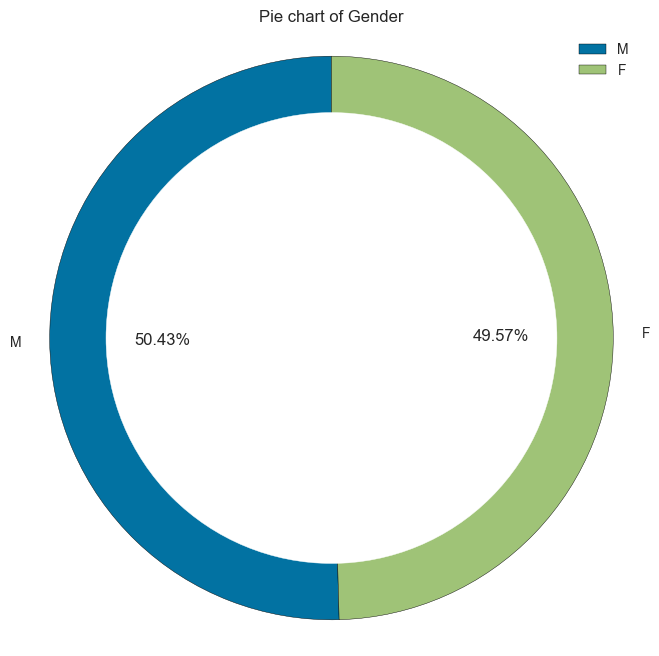

In [524]:
create_donnut_pie_chart(loan_amt_train_copy,'Gender')

In [525]:
gen_info_feat(loan_amt_train_copy, 'Age')

Description:
count   19500.000
mean       40.087
std        16.086
min        18.000
25%        25.000
50%        40.000
75%        55.000
max        65.000
Name: Age, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.04736566619271935


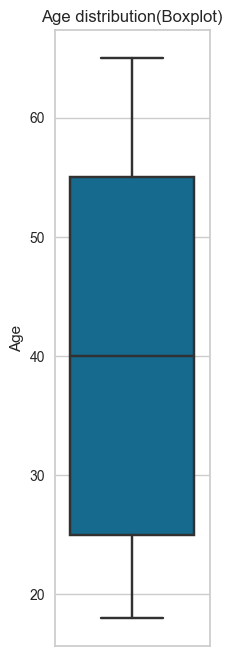

In [526]:
create_box_plot(loan_amt_train_copy, 'Age')

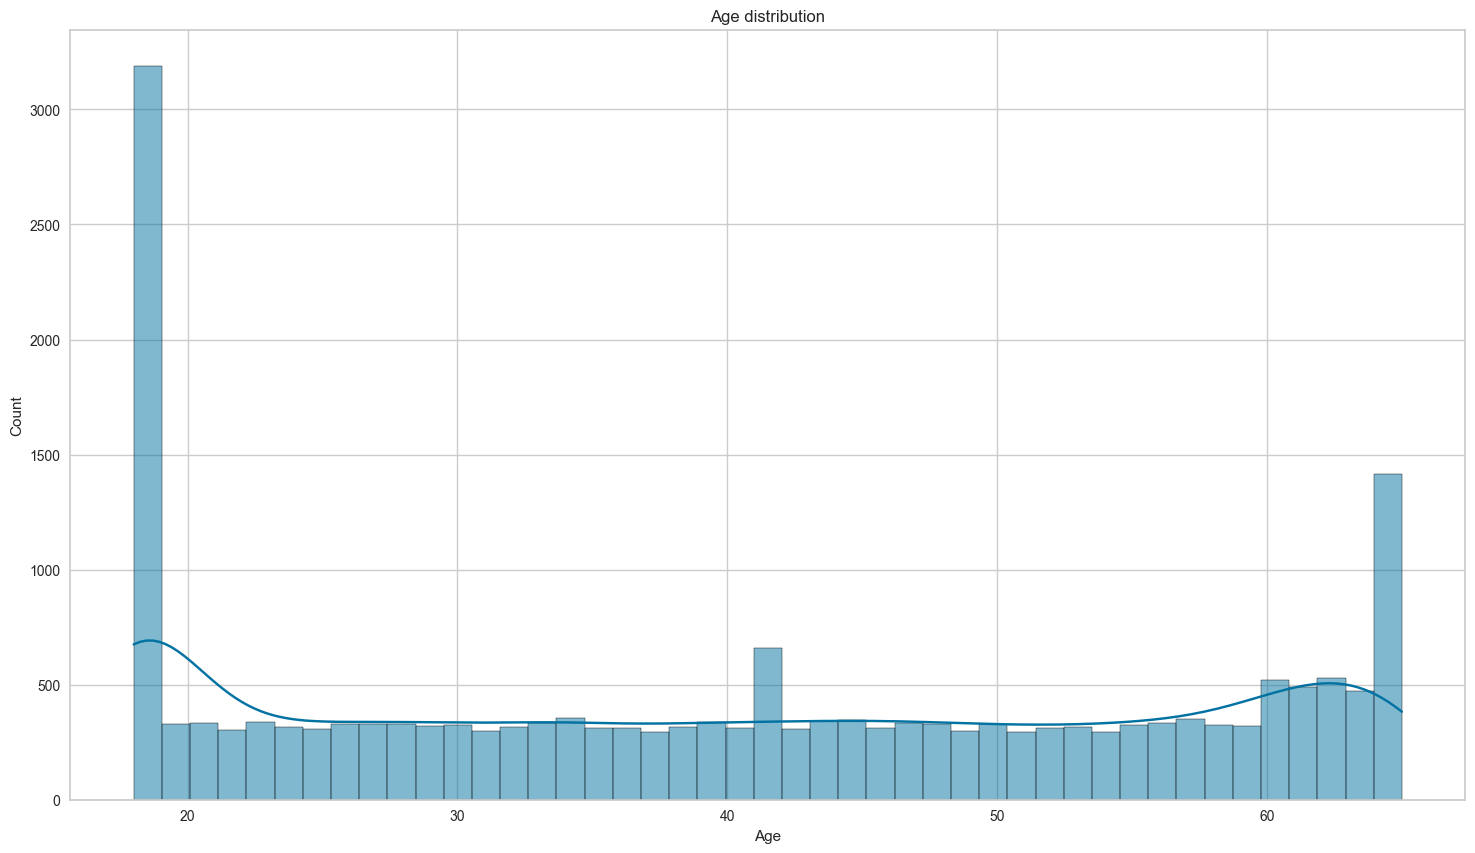

In [527]:
create_hist_plot(loan_amt_train_copy, 'Age', the_bins=45)

In [528]:
gen_info_feat(loan_amt_train_copy, 'Income (USD)')

Description:
count    16526.000
mean      2551.856
std       1745.404
min        378.760
25%       1649.420
50%       2217.385
75%       3090.477
max     122966.280
Name: Income (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
22.371505129608664


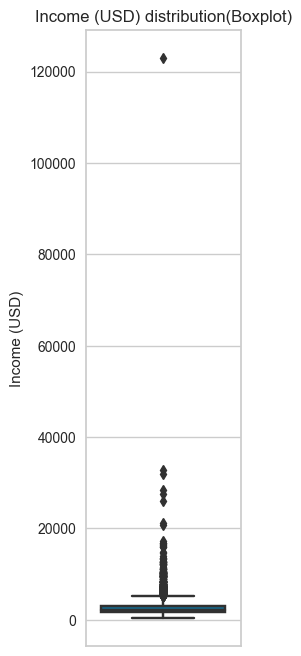

In [529]:

create_box_plot(loan_amt_train_copy, 'Income (USD)')

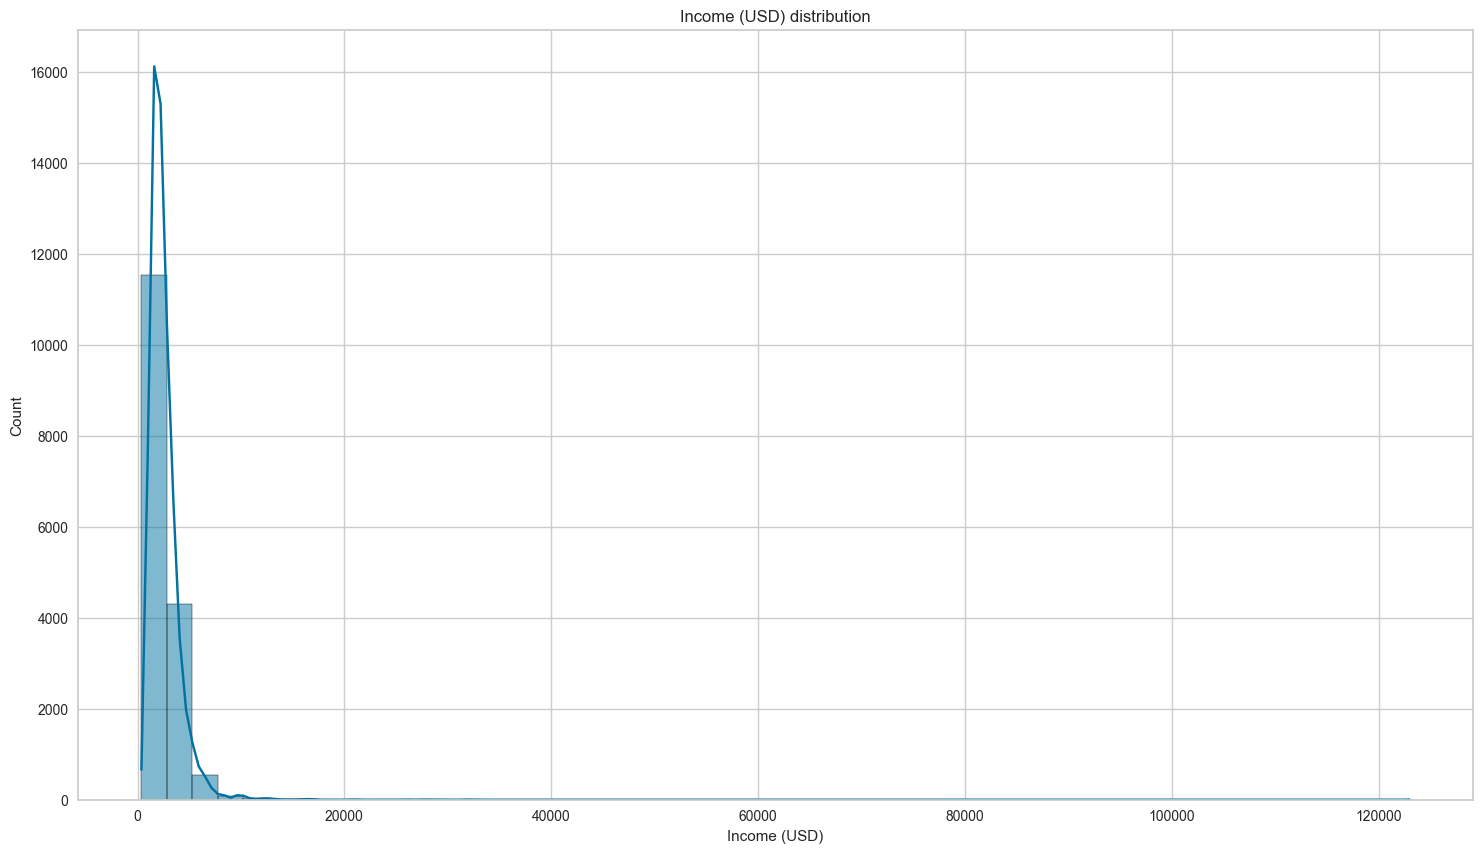

In [530]:
create_hist_plot(loan_amt_train_copy, 'Income (USD)', the_bins=50)

In [531]:
missing_val_norm(loan_amt_train_copy, 'Income (USD)')

'The percentage of missing rows is 15.25 %'

In [532]:
gen_info_feat(loan_amt_train_copy,'Income Stability')

Description:
count     18468
unique        2
top         Low
freq      16763
Name: Income Stability, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
      Count  Frequency (%)
Low   16763         90.768
High   1705          9.232


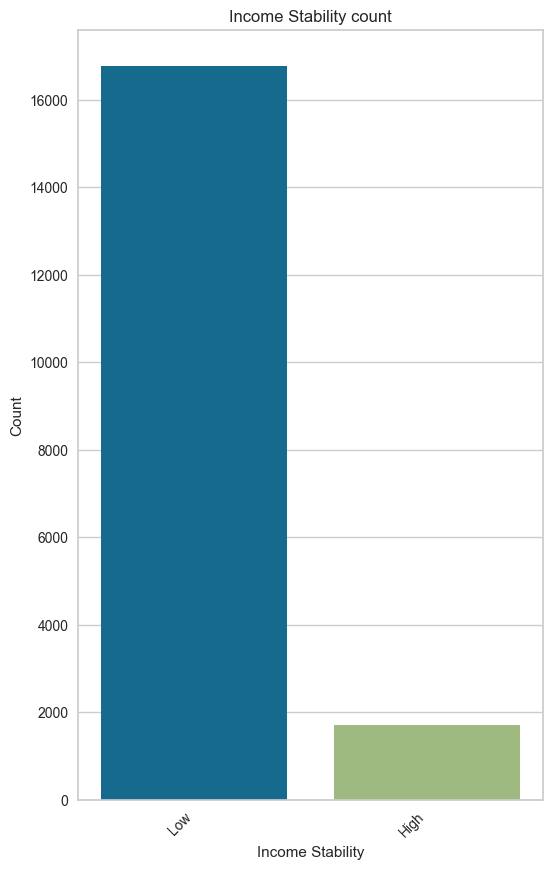

In [533]:
create_bar_plot(loan_amt_train_copy,'Income Stability')

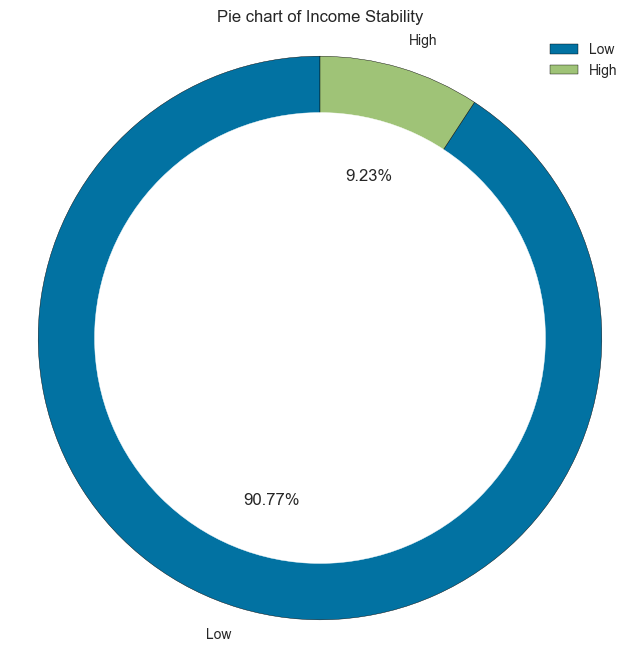

In [534]:
create_donnut_pie_chart(loan_amt_train_copy,'Income Stability')

In [535]:
gen_info_feat(loan_amt_train_copy,'Profession')

Description:
count       19500
unique          6
top       Working
freq        10939
Name: Profession, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Working               10939         56.097
Commercial associate   5225         26.795
Pensioner              1806          9.262
State servant          1527          7.831
Unemployed                2          0.010
Student                   1          0.005


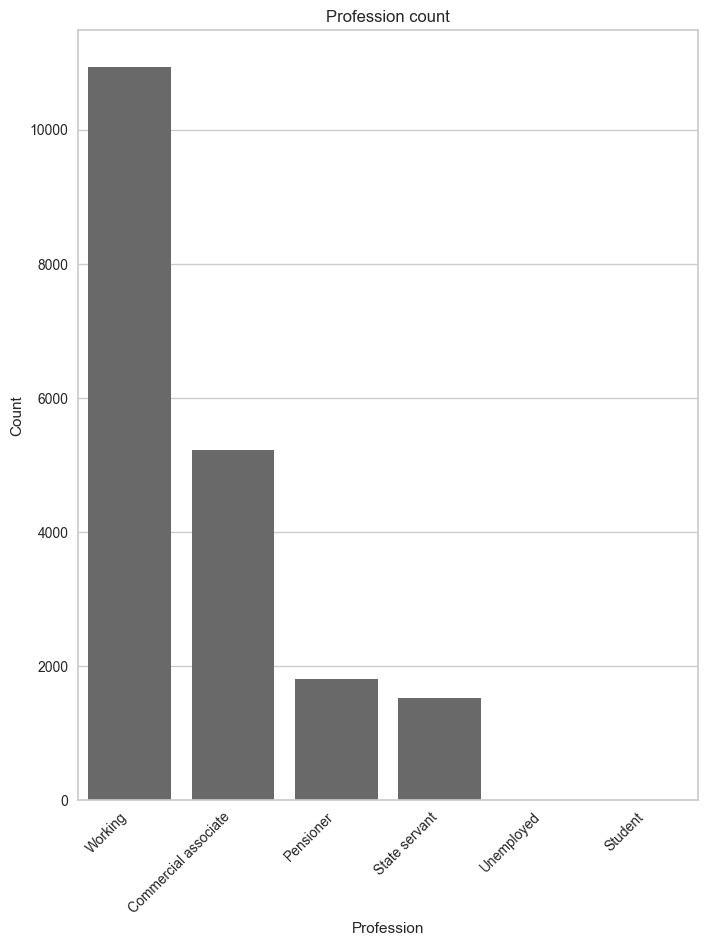

In [536]:
create_bar_plot(loan_amt_train_copy,'Profession')

In [537]:

gen_info_feat(loan_amt_train_copy,'Type of Employment')

Description:
count        14761
unique          18
top       Laborers
freq          3655
Name: Type of Employment, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Laborers                3655         24.761
Sales staff             2407         16.306
Core staff              2089         14.152
Managers                1621         10.982
Drivers                 1036          7.018
Accountants              886          6.002
High skill tech staff    843          5.711
Medicine staff           540          3.658
Security staff           384          2.601
Cooking staff            373          2.527
Cleaning staff           237          1.606
Private service staff    233          1.578
Secretaries              107          0.725
Waiters/barmen staff     101          0.684
Low-skill Laborers       101          0.684
Realty agents             55    

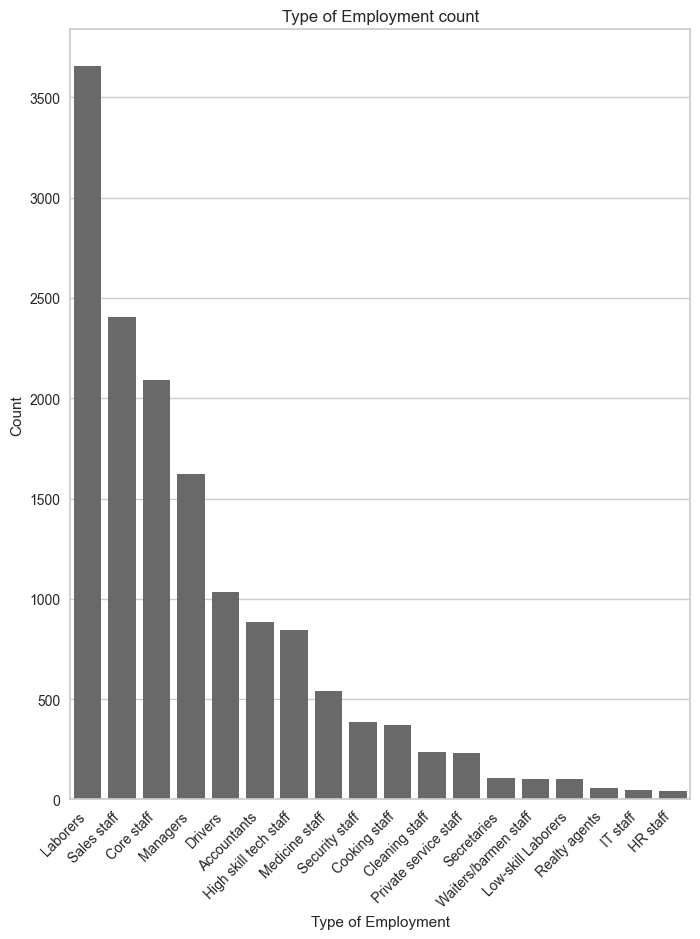

In [538]:
create_bar_plot(loan_amt_train_copy,'Type of Employment')

In [539]:
gen_info_feat(loan_amt_train_copy,'Location')

Description:
count          19500
unique             3
top       Semi-Urban
freq           13959
Name: Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban  13959         71.585
Rural        3502         17.959
Urban        2039         10.456


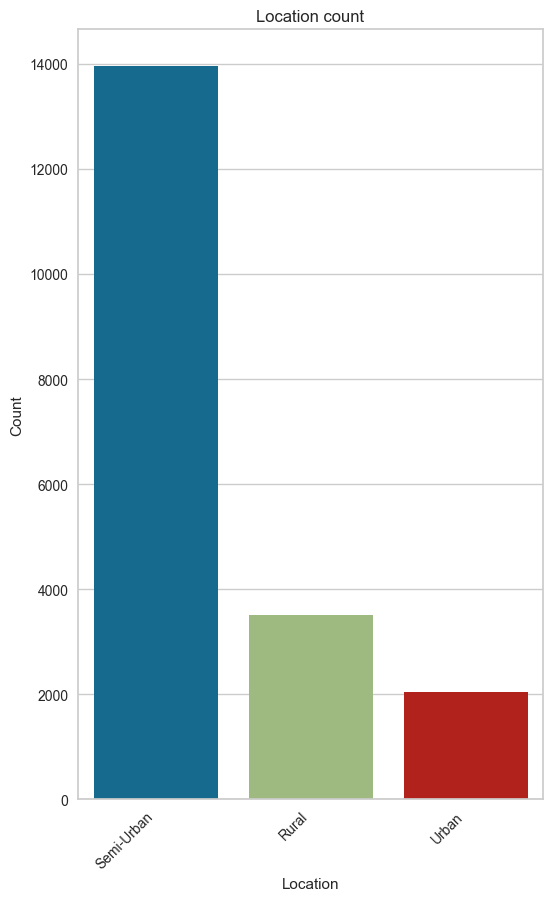

In [540]:
create_bar_plot(loan_amt_train_copy,'Location')

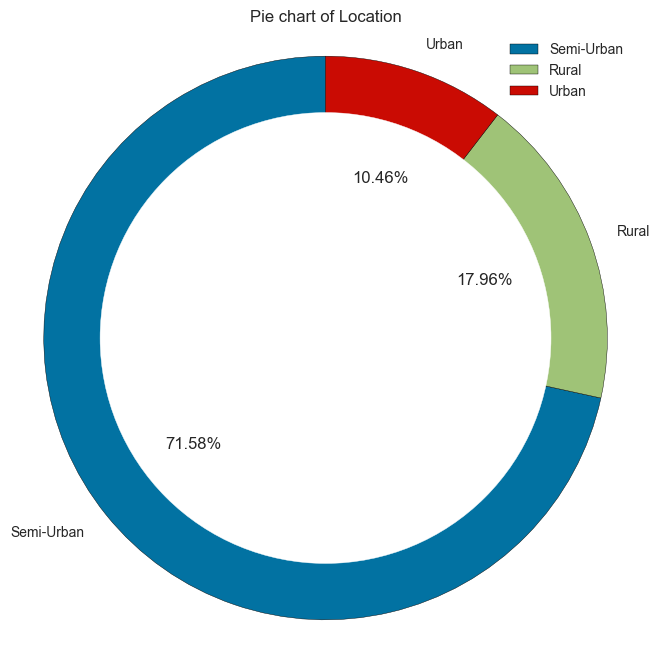

In [541]:
create_donnut_pie_chart(loan_amt_train_copy,'Location')

In [542]:
gen_info_feat(loan_amt_train_copy,'Current Loan Expenses (USD)')

Description:
count   19396.000
mean      400.122
std       241.713
min      -999.000
25%       248.167
50%       374.795
75%       520.963
max      3025.400
Name: Current Loan Expenses (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.19973882449384497


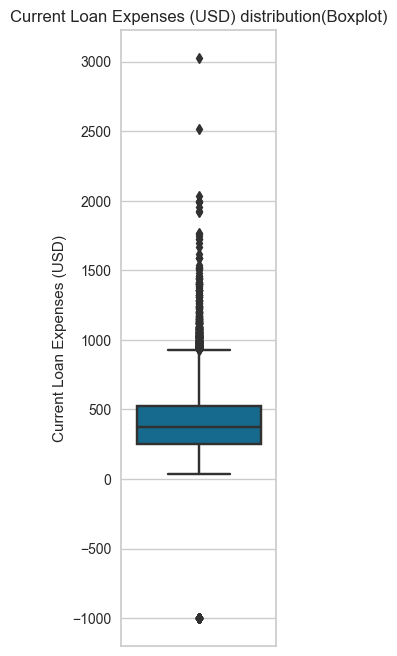

In [543]:

create_box_plot(loan_amt_train_copy, 'Current Loan Expenses (USD)')

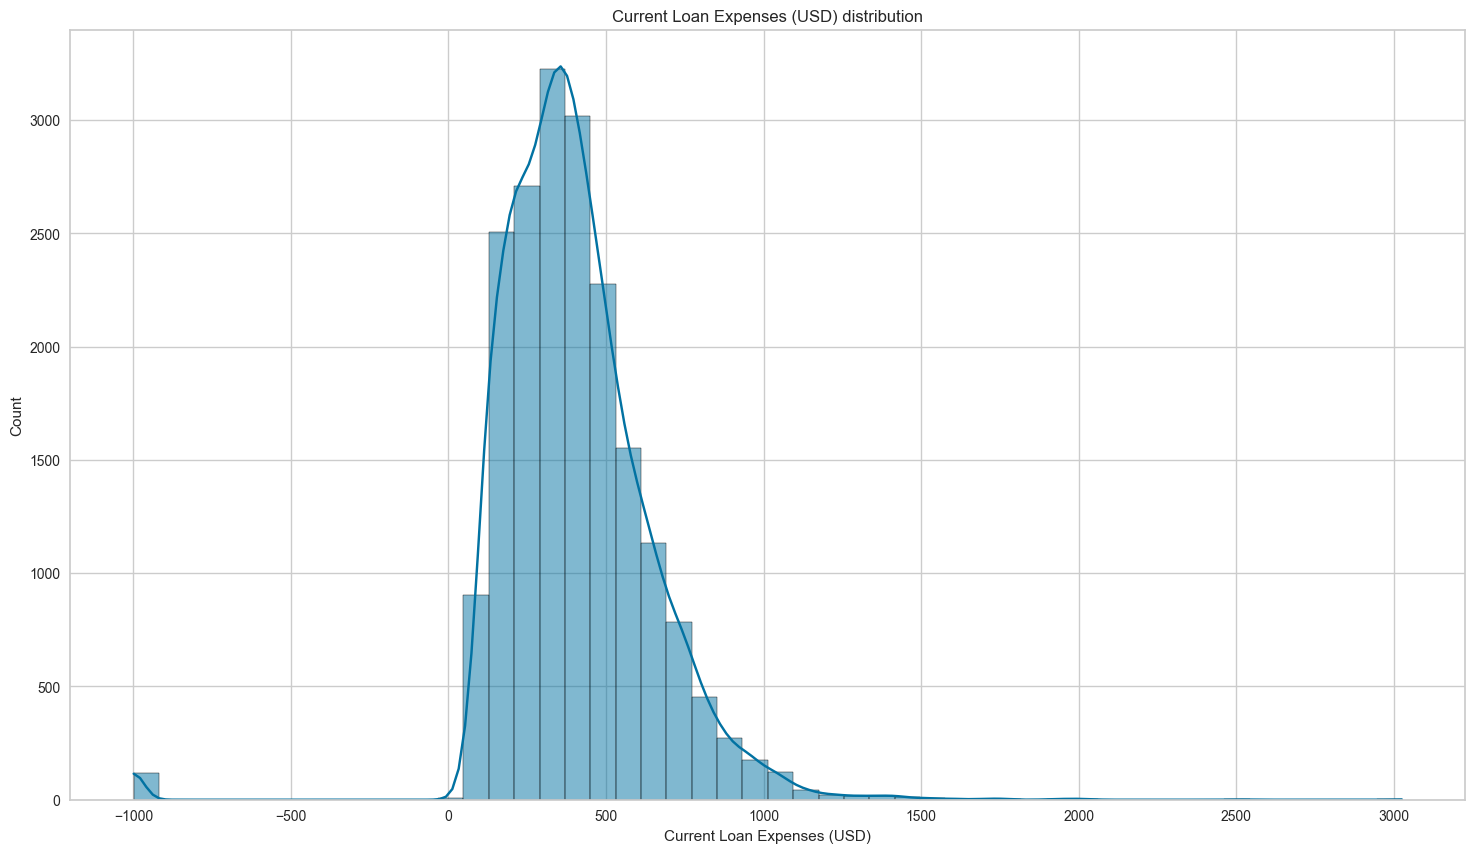

In [544]:
create_hist_plot(loan_amt_train_copy, 'Current Loan Expenses (USD)')

In [545]:
gen_info_feat(loan_amt_train_copy,'Expense Type 1')

Description:
count     19500
unique        2
top           N
freq      12495
Name: Expense Type 1, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
N  12495         64.077
Y   7005         35.923


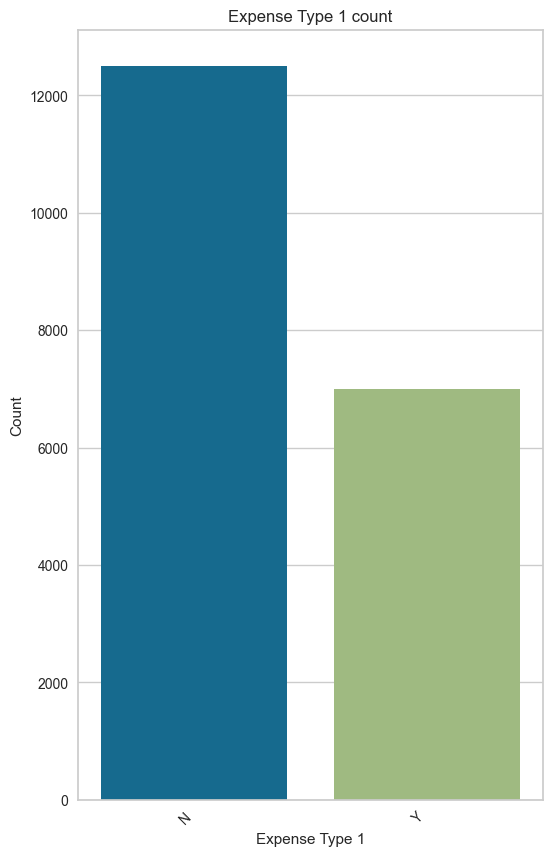

In [546]:
create_bar_plot(loan_amt_train_copy,'Expense Type 1')

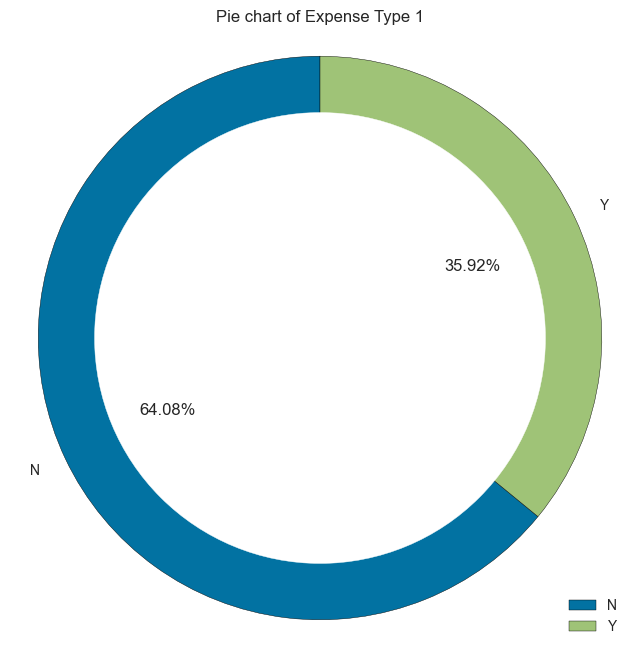

In [547]:
create_donnut_pie_chart(loan_amt_train_copy,'Expense Type 1')

In [548]:
gen_info_feat(loan_amt_train_copy,'Expense Type 2')

Description:
count     19500
unique        2
top           Y
freq      13135
Name: Expense Type 2, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
Y  13135         67.359
N   6365         32.641


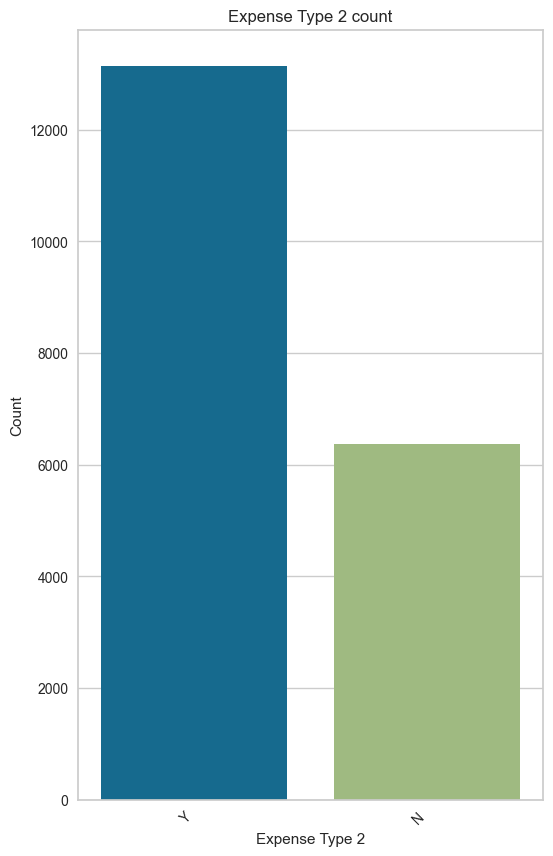

In [549]:
create_bar_plot(loan_amt_train_copy,'Expense Type 2')

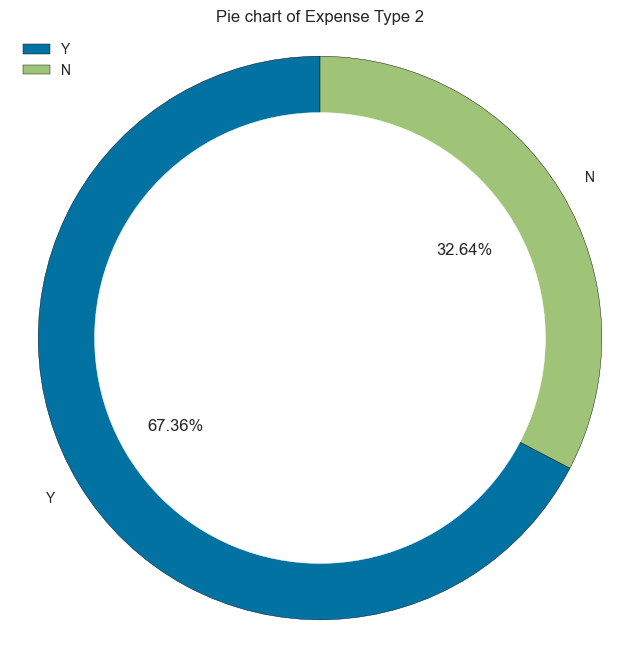

In [550]:
create_donnut_pie_chart(loan_amt_train_copy,'Expense Type 2')

In [551]:
gen_info_feat(loan_amt_train_copy,'Dependents')

Description:
count   17885.000
mean        2.253
std         0.950
min         1.000
25%         2.000
50%         2.000
75%         3.000
max        10.000
Name: Dependents, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
        Count  Frequency (%)
2.000    8442         47.202
3.000    3752         20.978
1.000    3640         20.352
4.000    1782          9.964
5.000     233          1.303
6.000      31          0.173
7.000       3          0.017
8.000       1          0.006
10.000      1          0.006


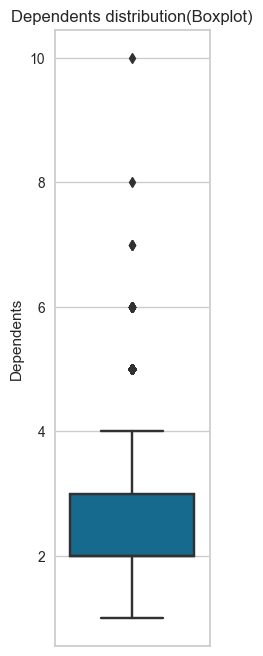

In [552]:
create_box_plot(loan_amt_train_copy, 'Dependents')

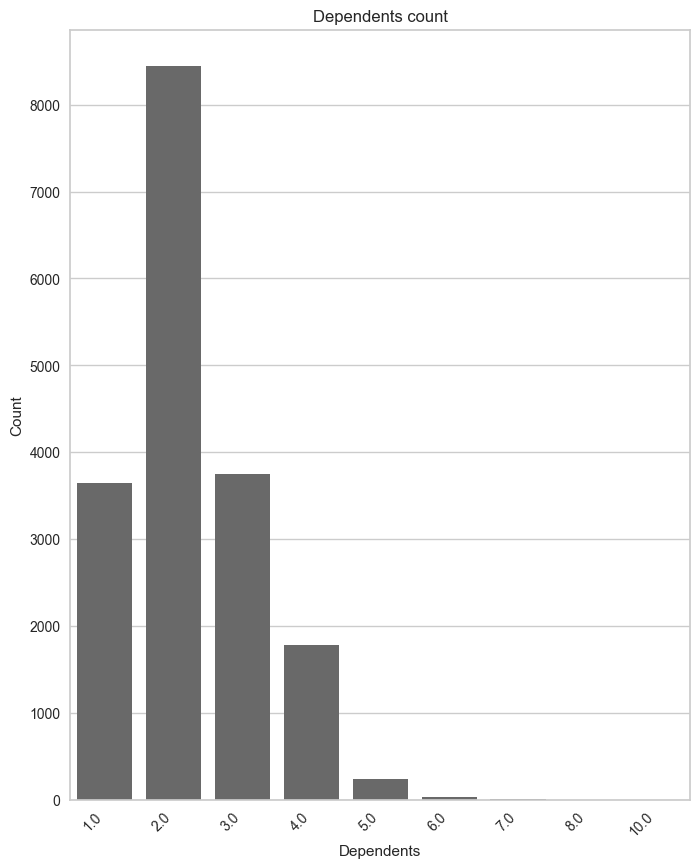

In [553]:
create_bar_plot(loan_amt_train_copy,'Dependents')

In [554]:
gen_info_feat(loan_amt_train_copy,'Credit Score')

Description:
count   18387.000
mean      739.578
std        72.369
min       580.000
25%       680.665
50%       739.650
75%       799.215
max       896.260
Name: Credit Score, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.016710244346266123


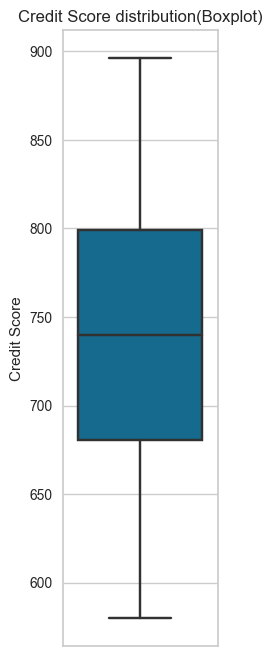

In [555]:
create_box_plot(loan_amt_train_copy, 'Credit Score')

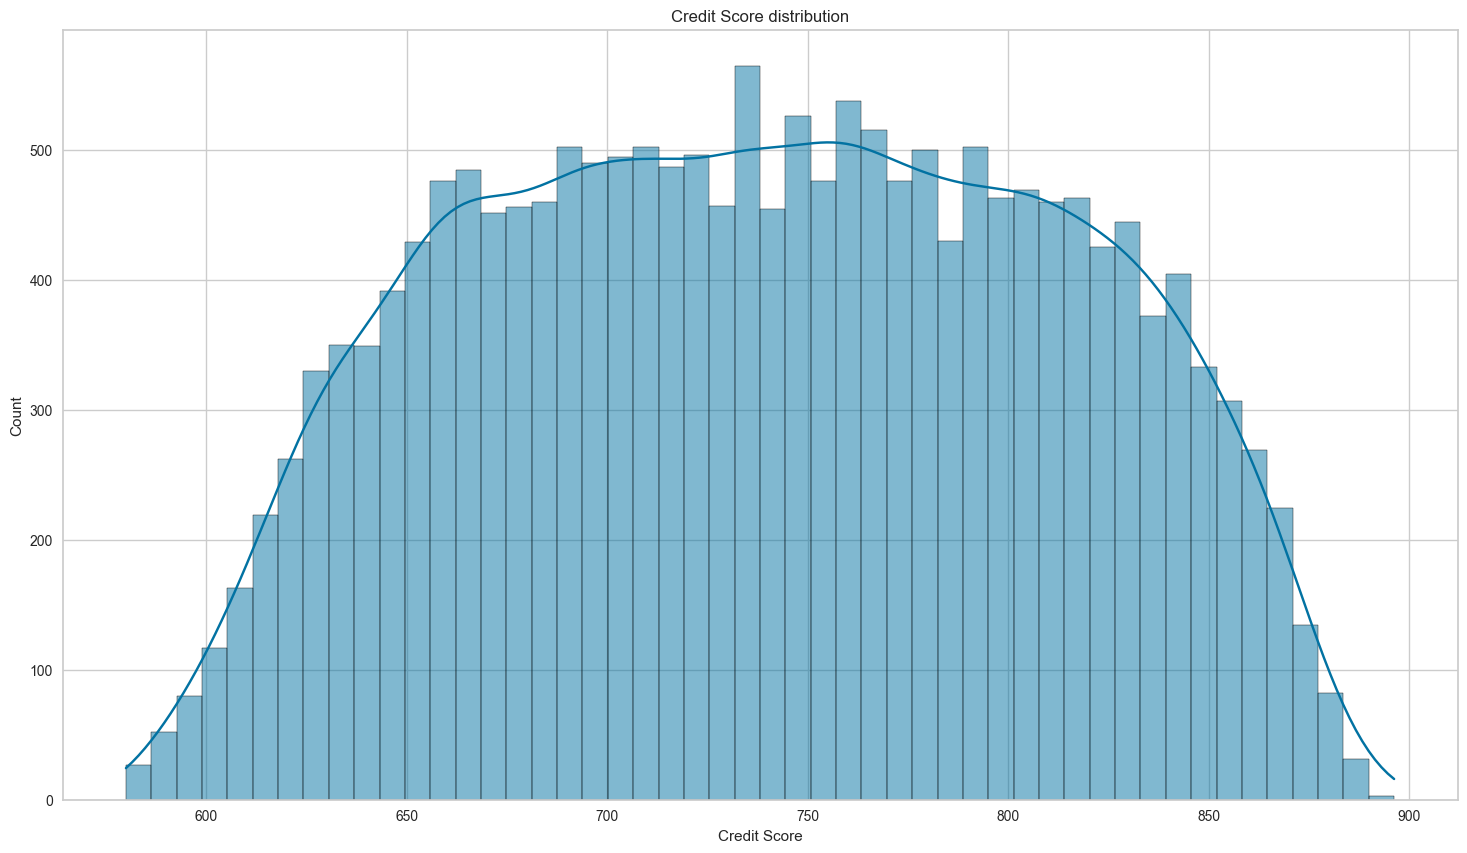

In [556]:
create_hist_plot(loan_amt_train_copy, 'Credit Score')

In [557]:

gen_info_feat(loan_amt_train_copy,'No. of Defaults')

Description:
count   19500.000
mean        0.193
std         0.395
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: No. of Defaults, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0  15740         80.718
1   3760         19.282


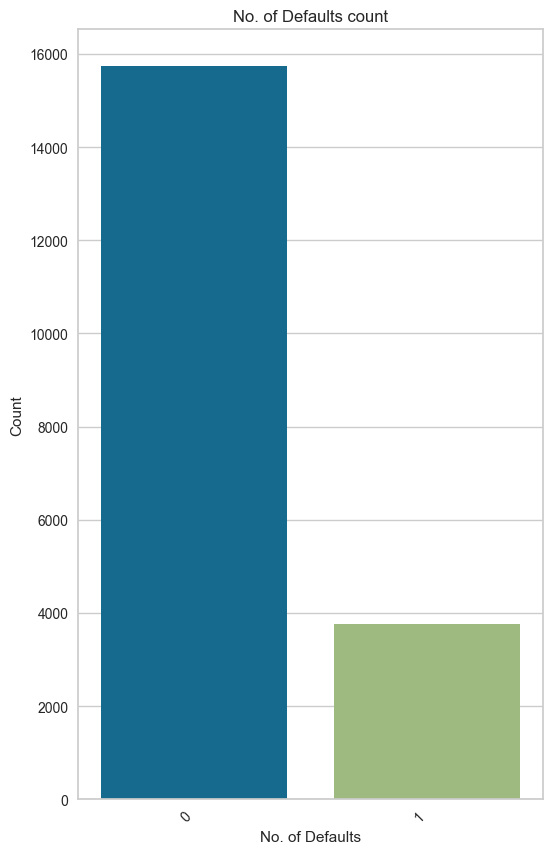

In [558]:
create_bar_plot(loan_amt_train_copy,'No. of Defaults')

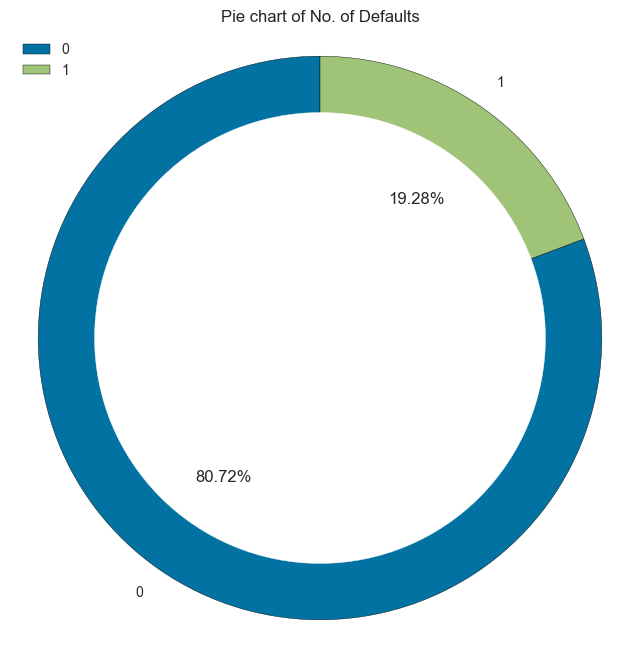

In [559]:
create_donnut_pie_chart(loan_amt_train_copy,'No. of Defaults')

In [560]:
gen_info_feat(loan_amt_train_copy,'Has Active Credit Card')

Description:
count      18509
unique         3
top       Active
freq        6344
Name: Has Active Credit Card, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
             Count  Frequency (%)
Active        6344         34.275
Inactive      6174         33.357
Unpossessed   5991         32.368


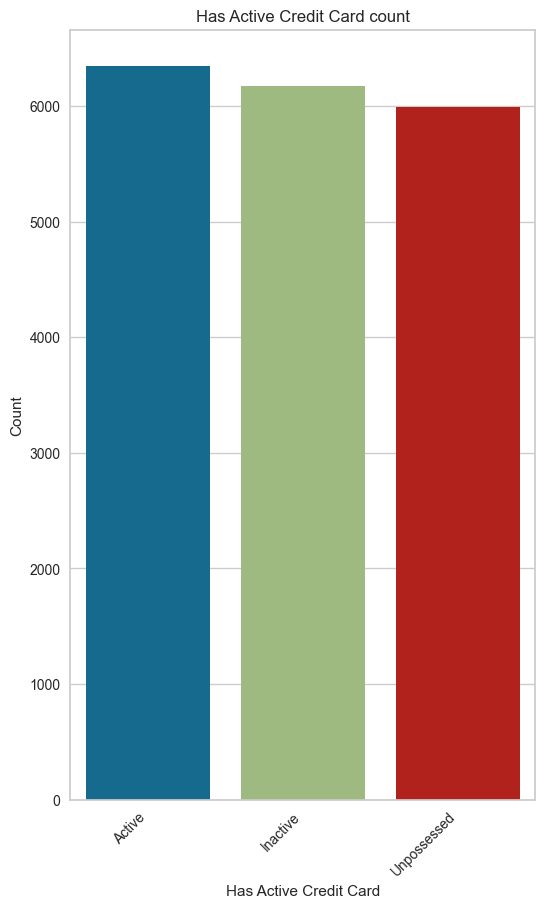

In [561]:
create_bar_plot(loan_amt_train_copy,'Has Active Credit Card')

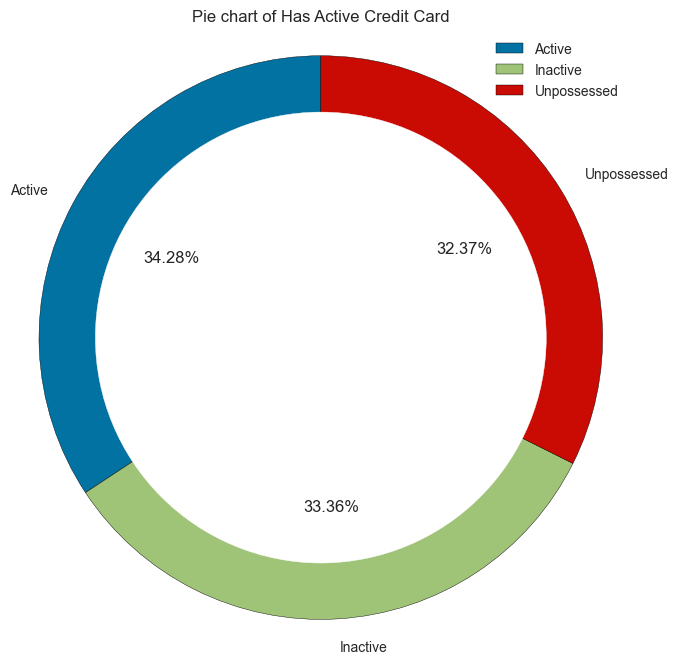

In [562]:
create_donnut_pie_chart(loan_amt_train_copy,'Has Active Credit Card')

In [563]:

gen_info_feat(loan_amt_train_copy,'Property Age')

Description:
count    44.808
mean      6.989
std       4.783
min       1.037
25%       4.518
50%       6.081
75%       8.464
max     336.663
Name: Property Age, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
22.51121044218723


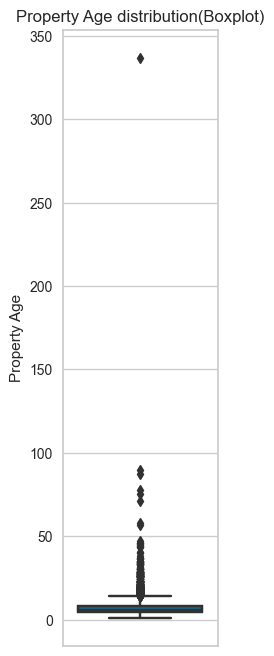

In [564]:
create_box_plot(loan_amt_train_copy, 'Property Age')

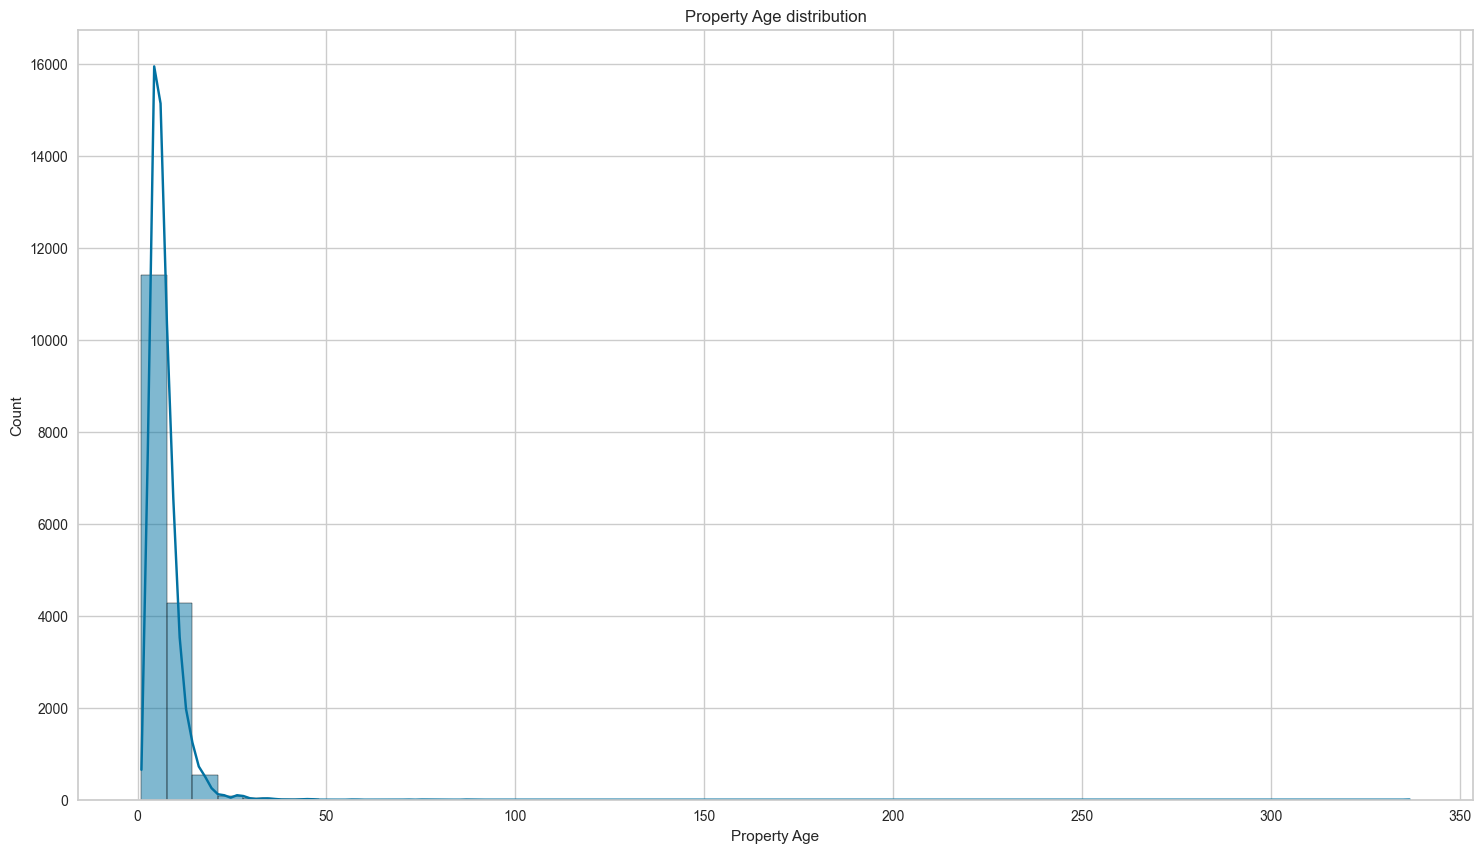

In [565]:
create_hist_plot(loan_amt_train_copy, 'Property Age')

In [566]:
gen_info_feat(loan_amt_train_copy,'Property Type')

Description:
count   19500.000
mean        2.470
std         1.120
min         1.000
25%         1.000
50%         2.000
75%         3.000
max         4.000
Name: Property Type, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
1   5077         26.036
2   4913         25.195
3   4787         24.549
4   4723         24.221


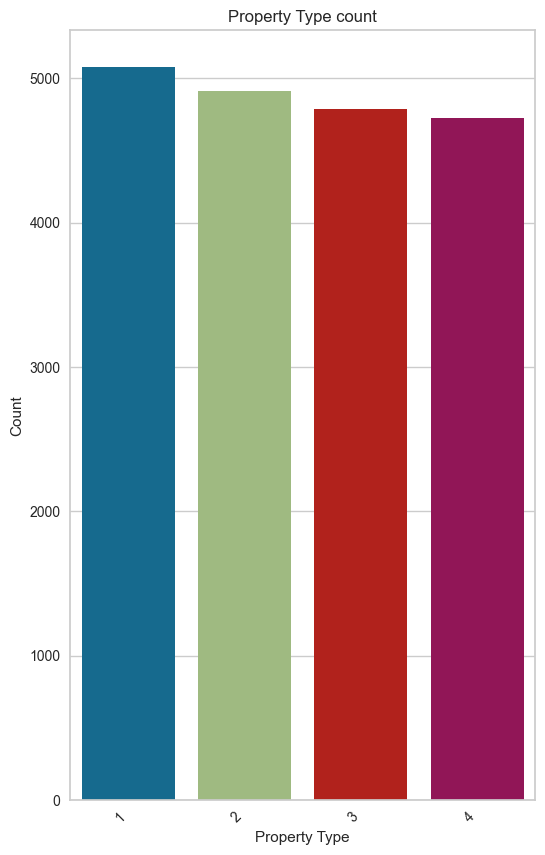

In [567]:
create_bar_plot(loan_amt_train_copy,'Property Type')

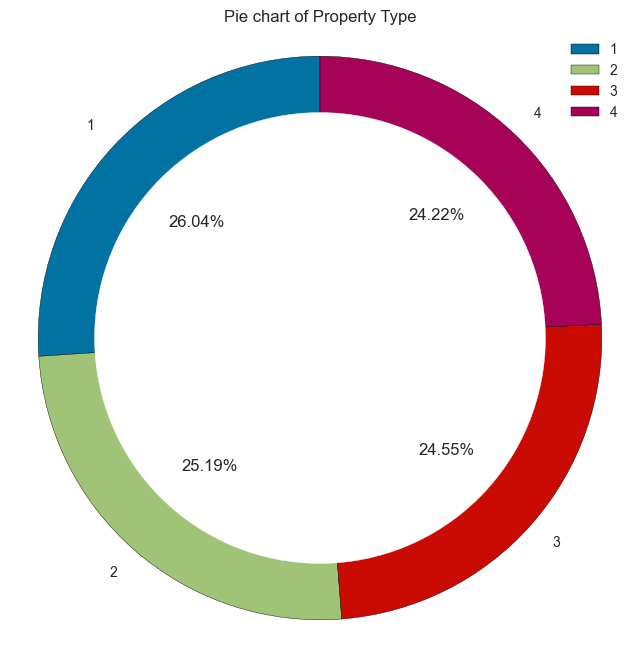

In [568]:
create_donnut_pie_chart(loan_amt_train_copy,'Property Type')

In [569]:
gen_info_feat(loan_amt_train_copy,'Property Location')

Description:
count          19282
unique             3
top       Semi-Urban
freq            6723
Name: Property Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban   6723         34.867
Rural        6549         33.964
Urban        6010         31.169


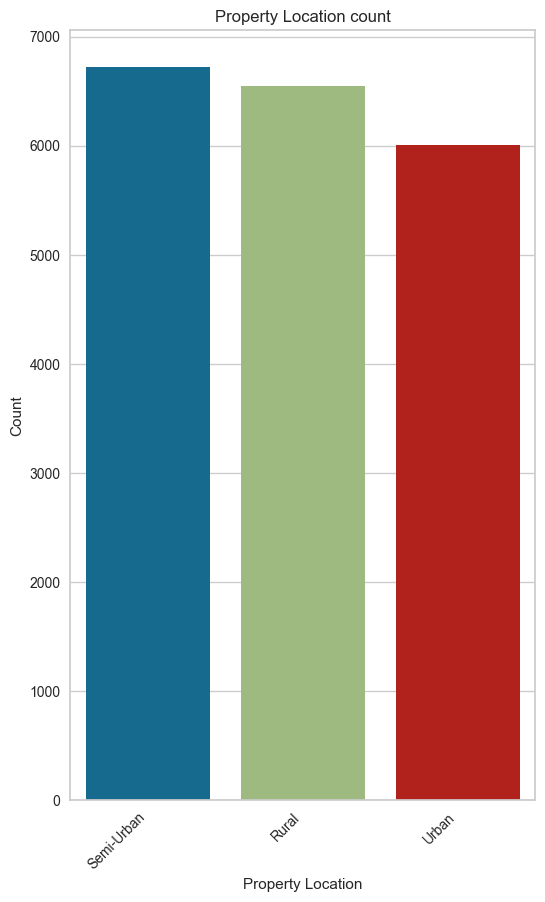

In [570]:
create_bar_plot(loan_amt_train_copy,'Property Location')

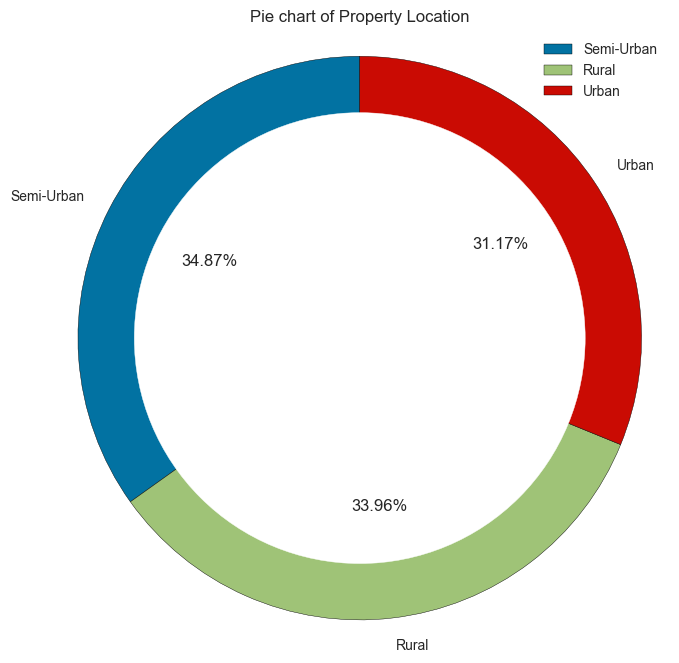

In [571]:
create_donnut_pie_chart(loan_amt_train_copy,'Property Location')

In [572]:
gen_info_feat(loan_amt_train_copy,'Co-Applicant')

Description:
count   19500.000
mean       -4.274
std        71.420
min      -999.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
Name: Co-Applicant, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
      Count  Frequency (%)
 1    16560         84.923
 0     2840         14.564
-999    100          0.513


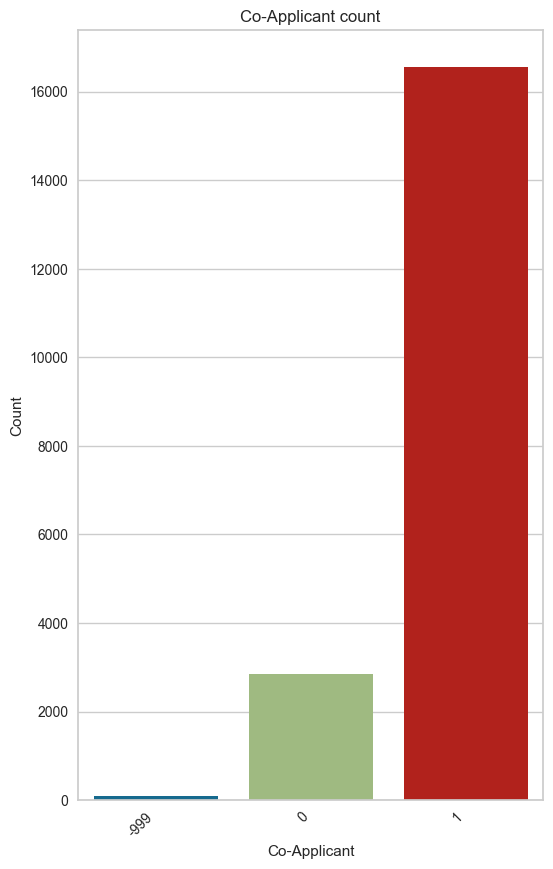

In [573]:
create_bar_plot(loan_amt_train_copy,'Co-Applicant')

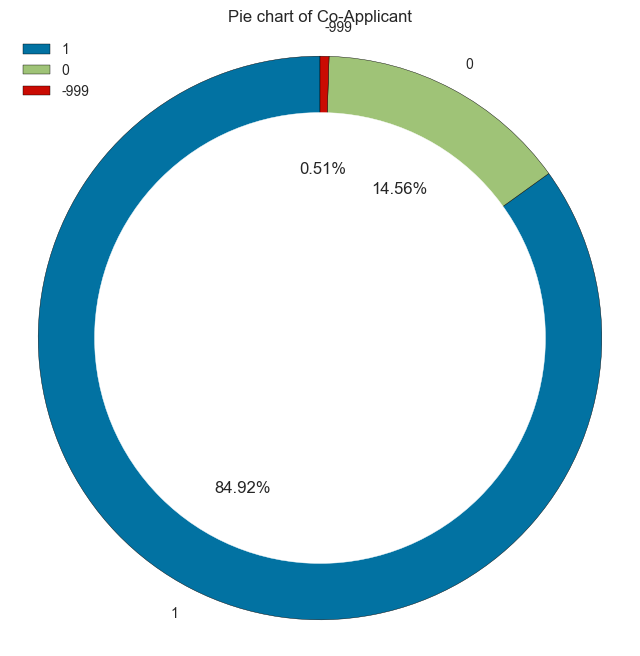

In [574]:
create_donnut_pie_chart(loan_amt_train_copy,'Co-Applicant')

In [575]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
gen_info_feat(loan_amt_train_copy,'Property Price')

Description:
count     19500.000
mean     131933.258
std       93678.679
min        -999.000
25%       60658.740
50%      110305.925
75%      178974.645
max     1077966.730
Name: Property Price, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.4111221025421703


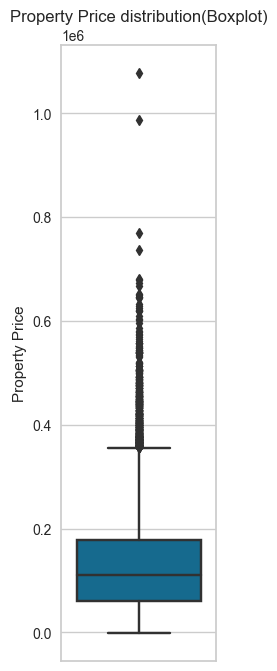

In [576]:

create_box_plot(loan_amt_train_copy, 'Property Price')

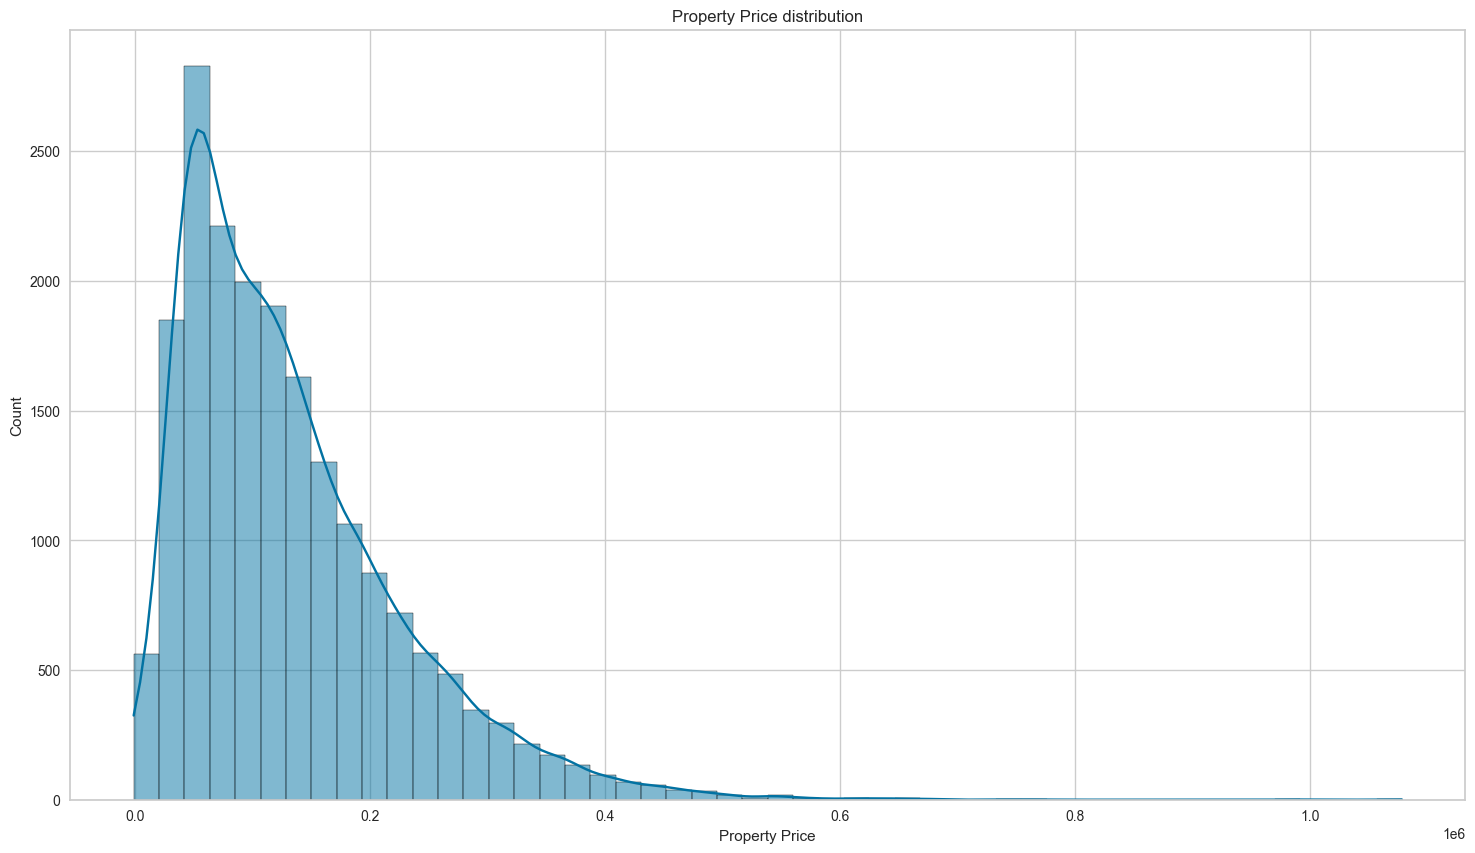

In [577]:
create_hist_plot(loan_amt_train_copy, 'Property Price')

In [578]:
gen_info_feat(loan_amt_train_copy,'Loan Sanction Amount (USD)')

Description:
count    19268.000
mean     47577.797
std      48296.582
min       -999.000
25%          0.000
50%      35013.020
75%      74079.872
max     395368.740
Name: Loan Sanction Amount (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2140701702158658


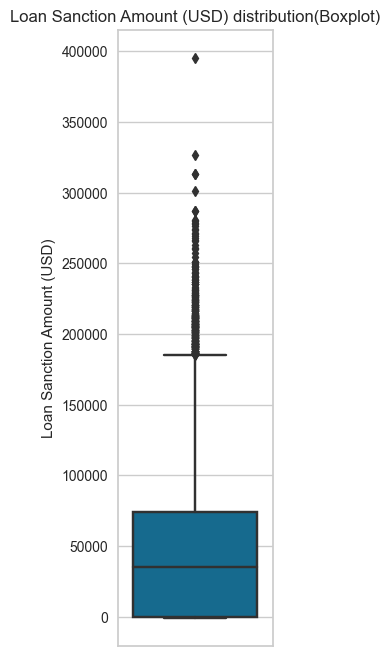

In [579]:
create_box_plot(loan_amt_train_copy, 'Loan Sanction Amount (USD)')

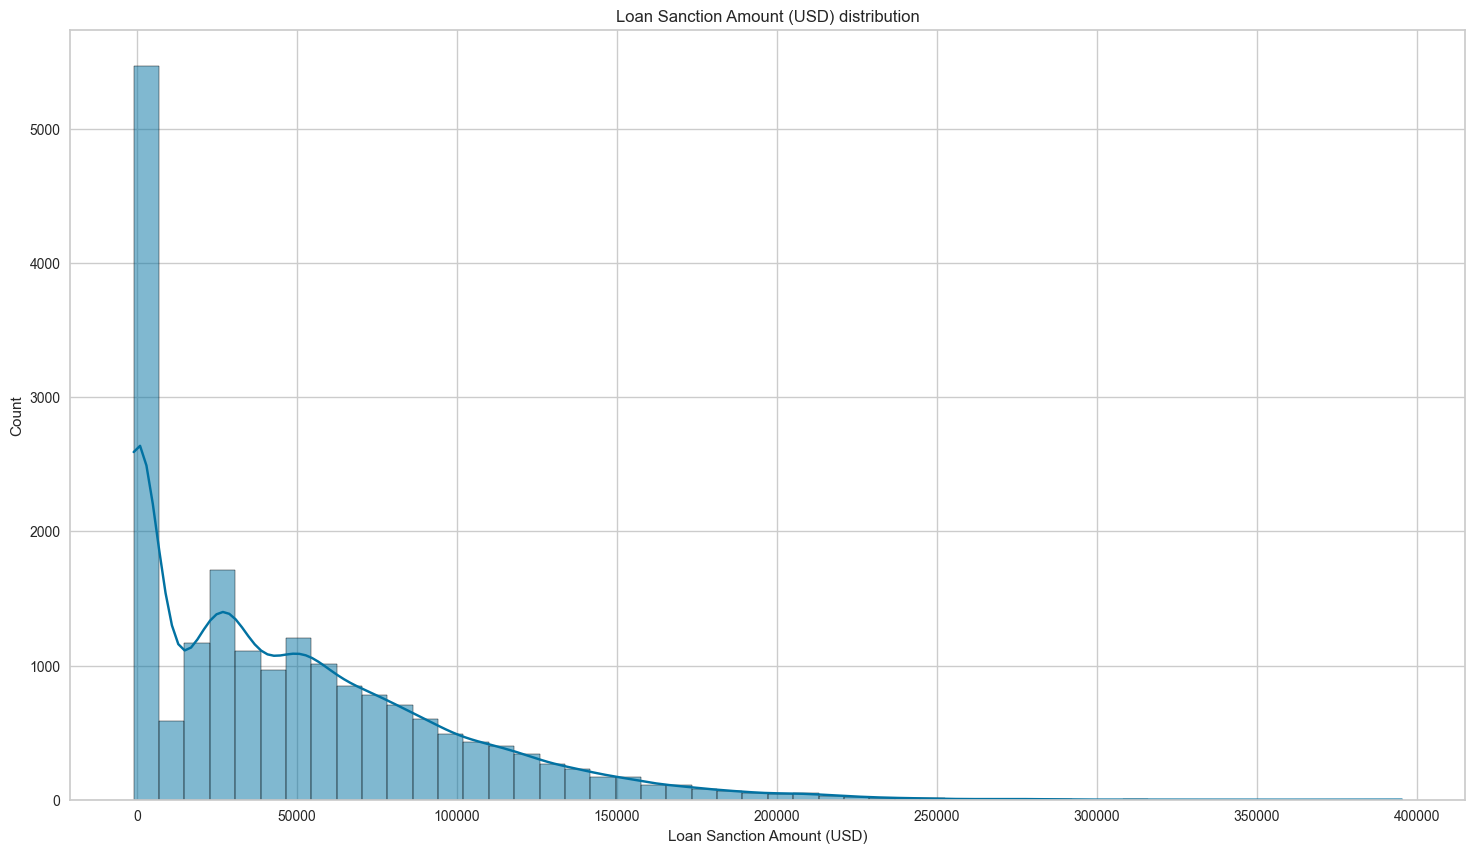

In [580]:
create_hist_plot(loan_amt_train_copy, 'Loan Sanction Amount (USD)')

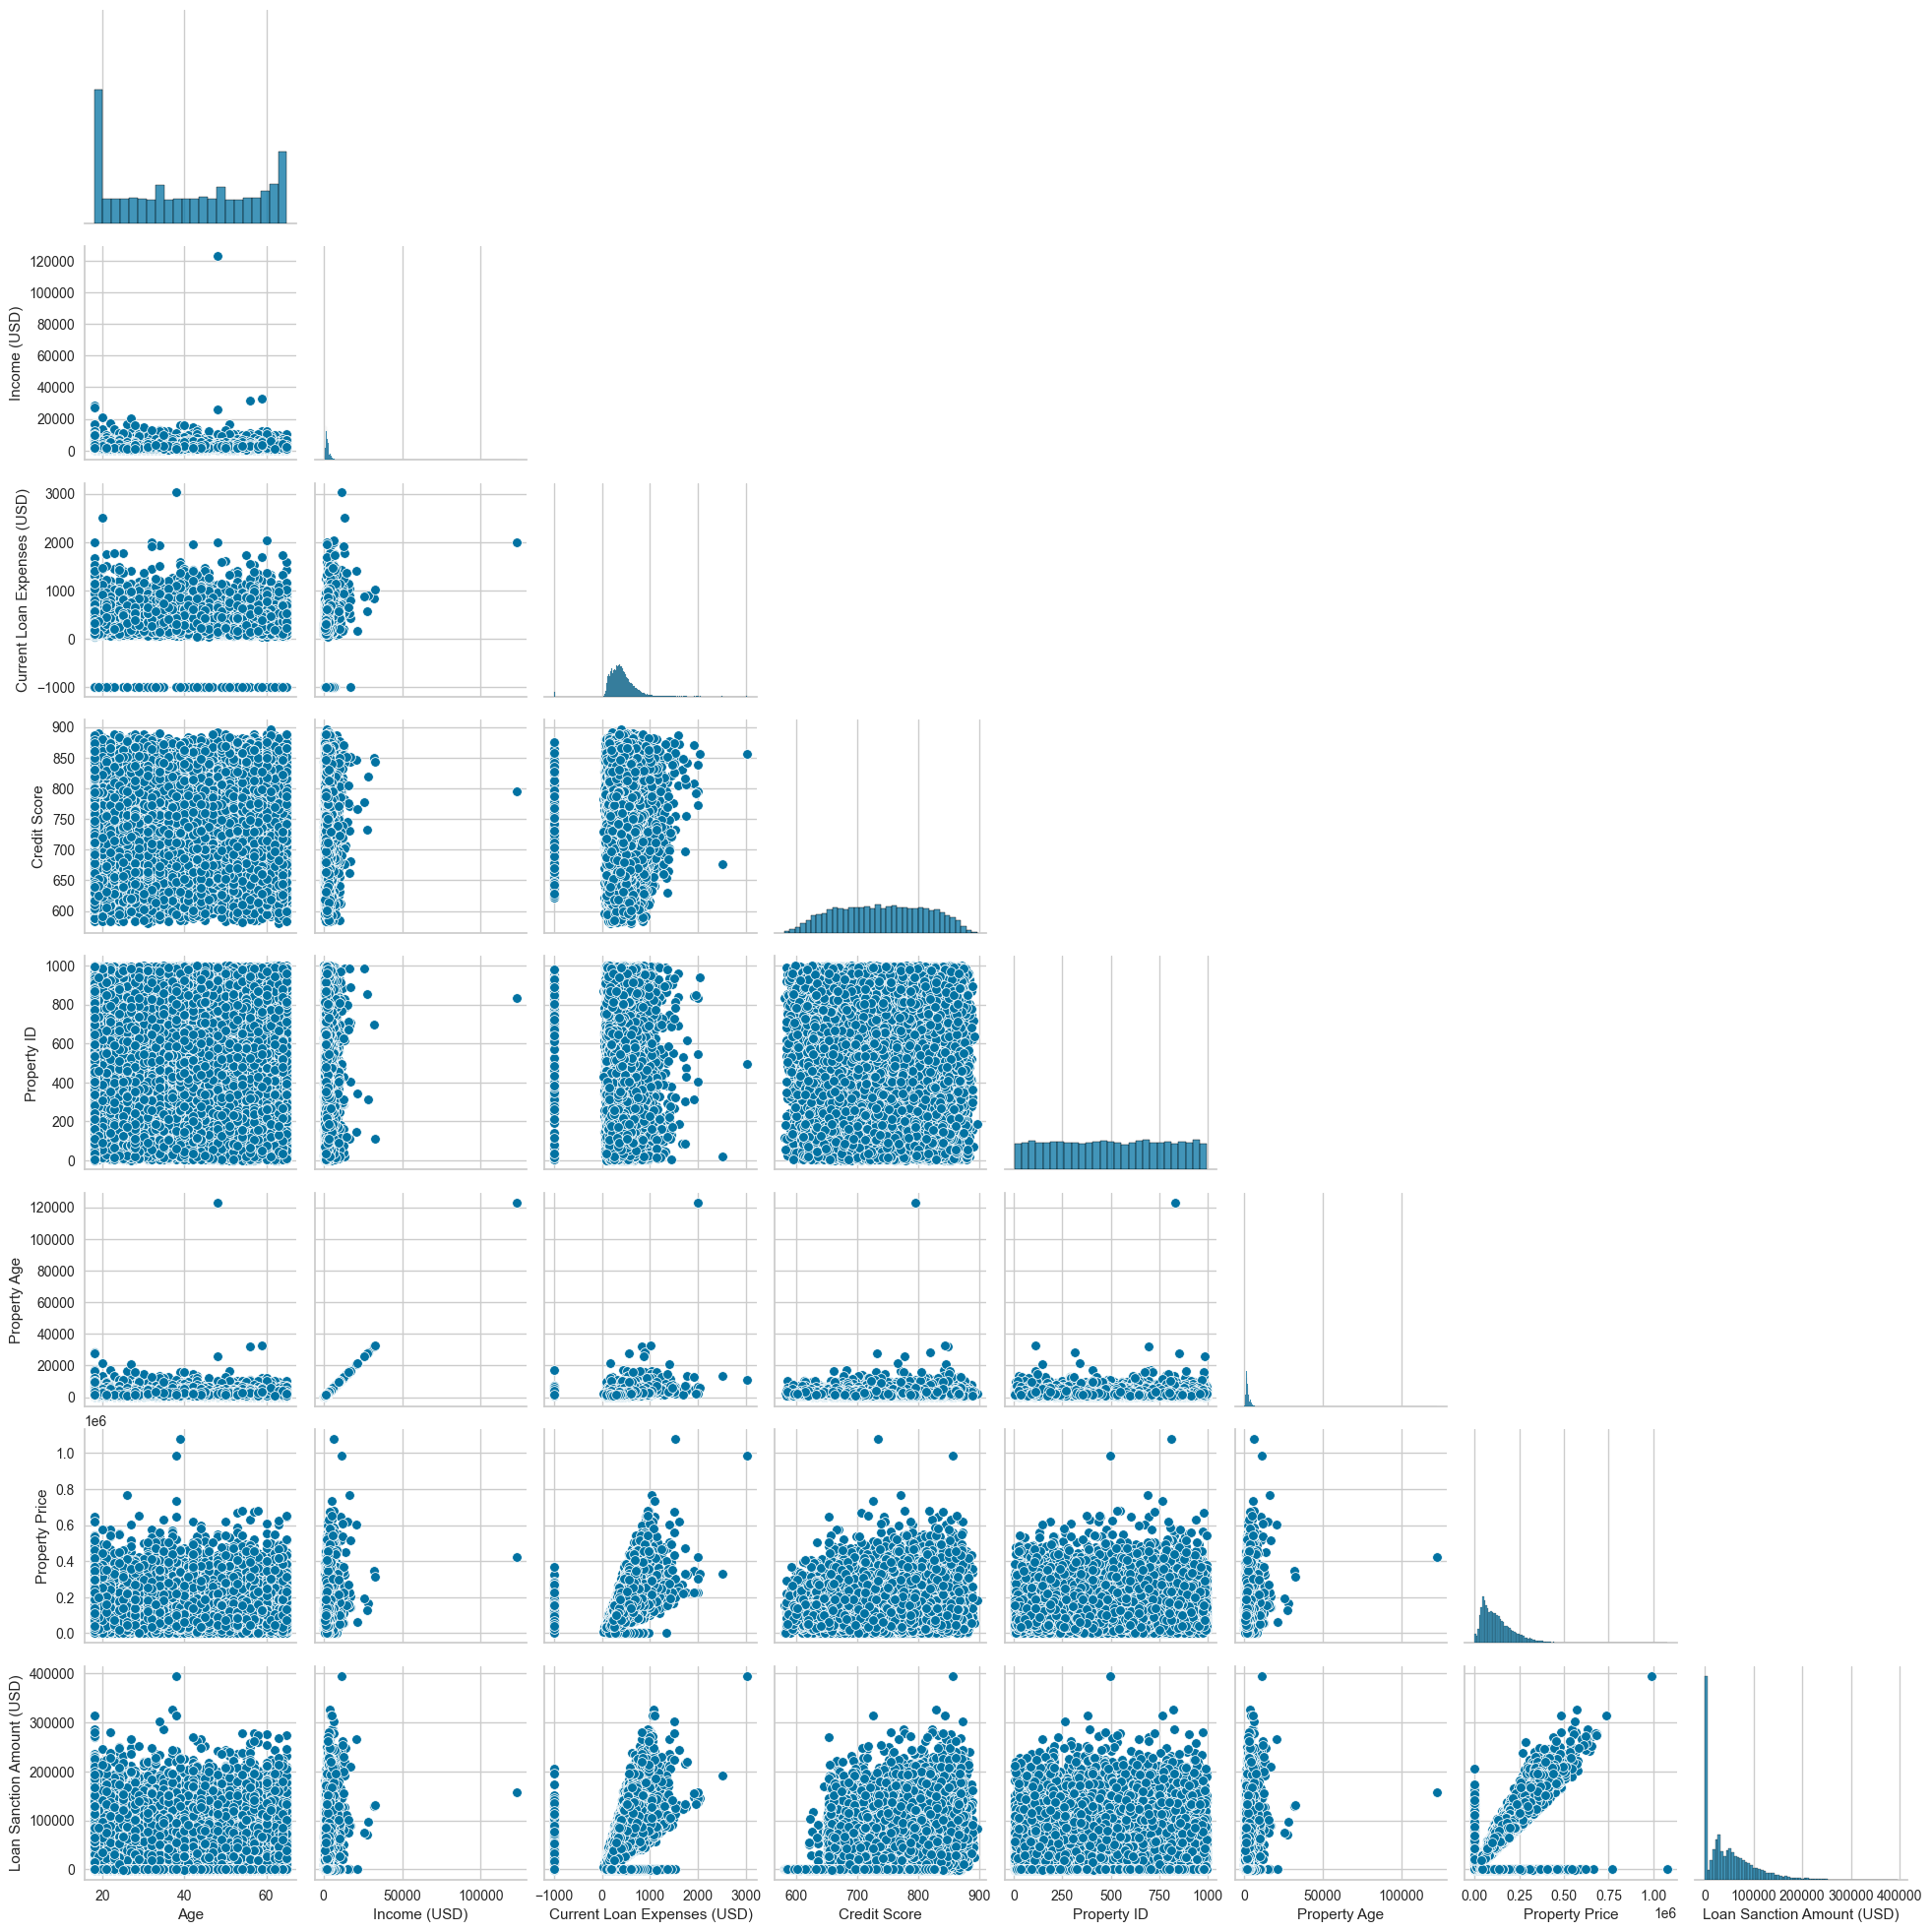

In [581]:
sns.pairplot(loan_amt_train_copy.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1),corner=True)
plt.show()

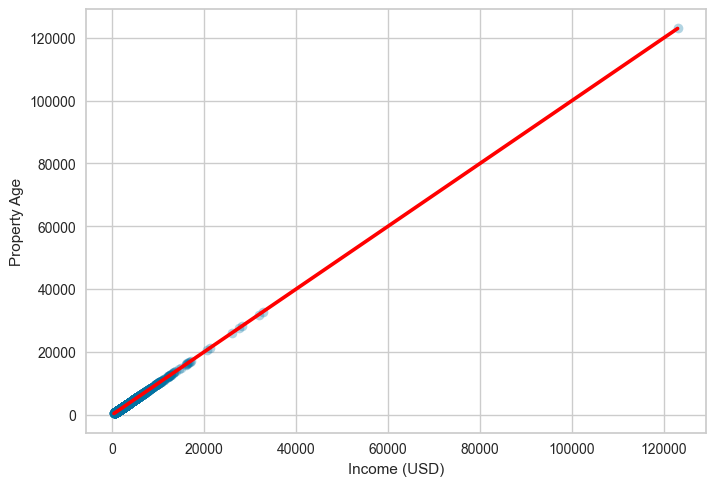

In [582]:
sns.regplot(x='Income (USD)',y='Property Age',data=loan_amt_train_copy,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

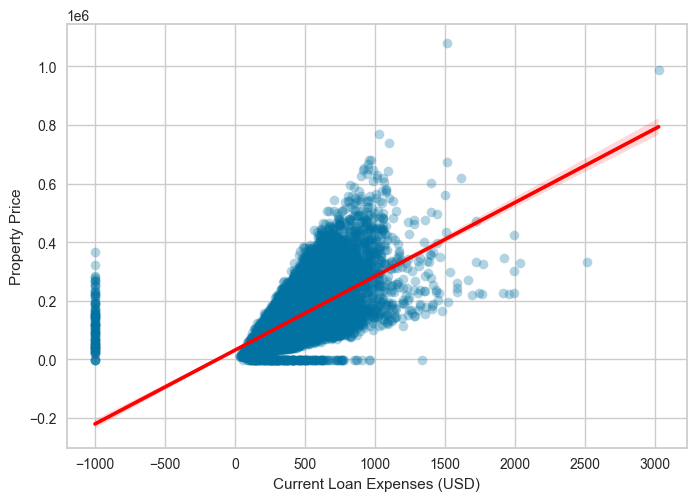

In [583]:
sns.regplot(x='Current Loan Expenses (USD)',y='Property Price',data=loan_amt_train_copy,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

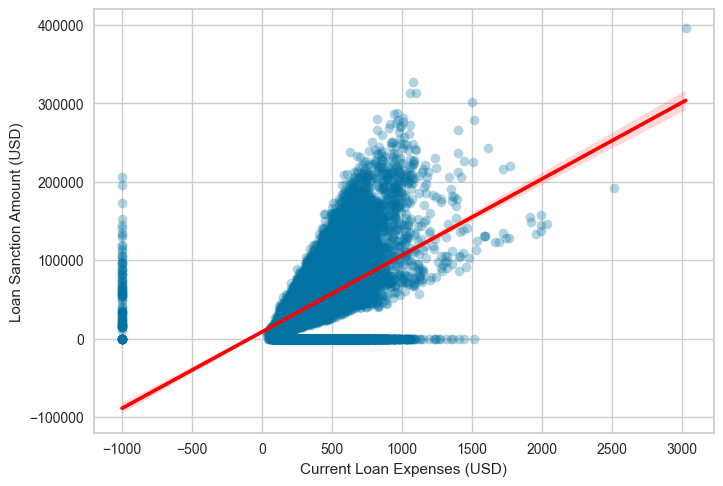

In [584]:
sns.regplot(x='Current Loan Expenses (USD)',y='Loan Sanction Amount (USD)',data=loan_amt_train_copy,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

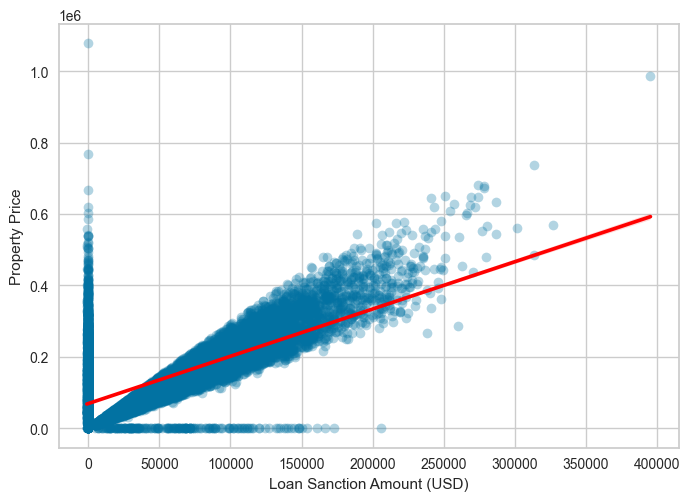

In [585]:
sns.regplot(x='Loan Sanction Amount (USD)',y='Property Price',data=loan_amt_train_copy,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


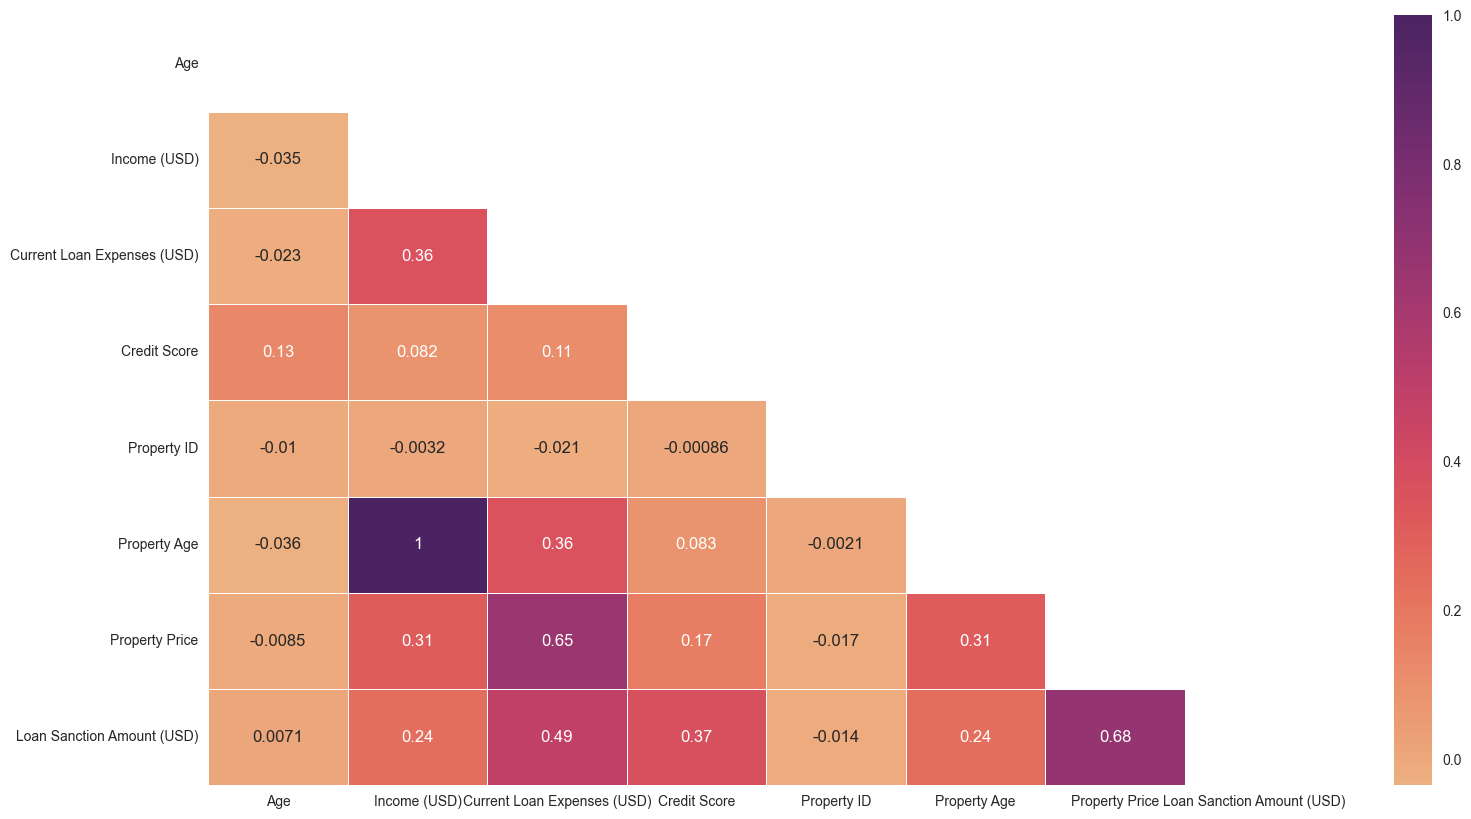

In [586]:
loan_amt_train_copy_corr = loan_amt_train_copy.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(loan_amt_train_copy_corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(loan_amt_train_copy_corr, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

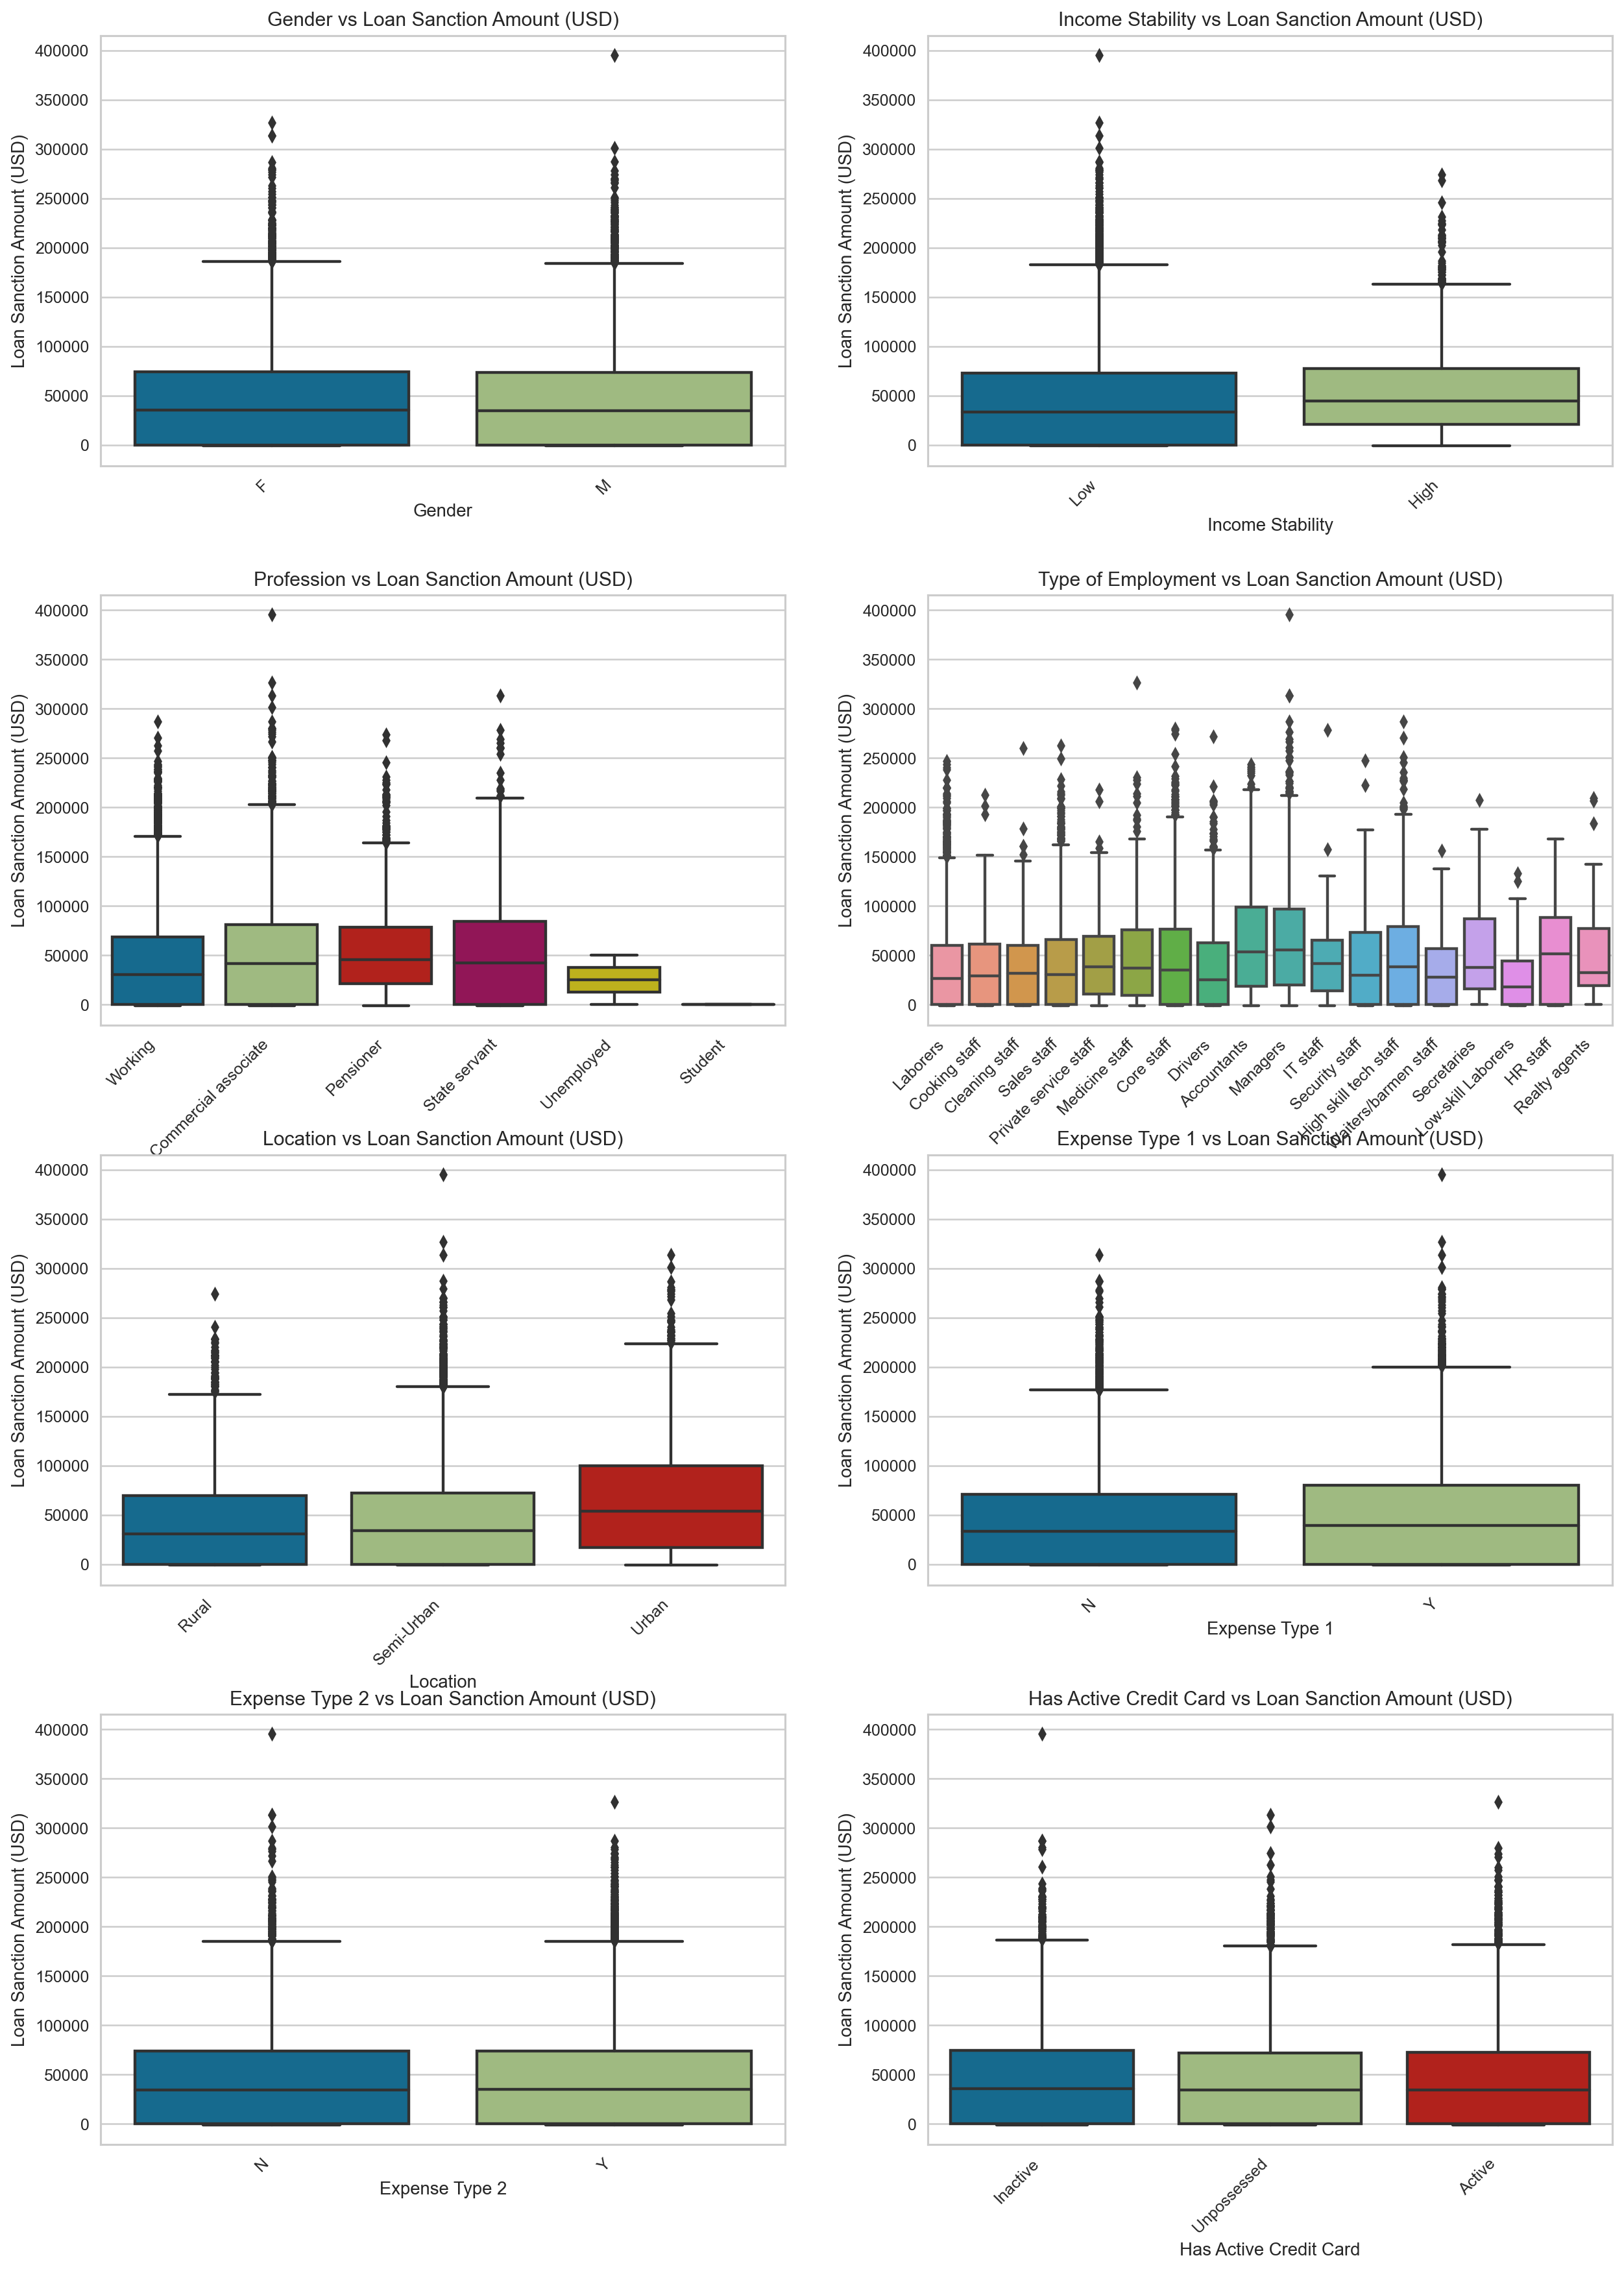

In [587]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['Gender','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=loan_amt_train_copy[cat_features[cat_ft_count]],y=loan_amt_train_copy['Loan Sanction Amount (USD)'])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Loan Sanction Amount (USD)")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Loan Sanction Amount (USD)')
            cat_ft_count += 1
    break

# Transformations to be done on each feature
- Customer ID: Drop the feature
- Name: Drop the feature


In [588]:
class OutlierImputer(BaseEstimator, TransformerMixin):
    def __init__(self,feat_with_outliers = ['Income (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Property Age', 'Property Price']):
        self.feat_with_outliers = feat_with_outliers
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_outliers).issubset(df.columns)):
            # 25% quantile
            Q1 = df[self.feat_with_outliers].quantile(.25)
            # 75% quantile
            Q3 = df[self.feat_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df = df[~((df[self.feat_with_outliers] < (Q1 - 1.5 * IQR)) | (df[self.feat_with_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [589]:
class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, mode_imputed_ft = ['Gender','Income Stability','Dependents','Has Active Credit Card','Property Location'], median_imputed_ft = ['Income (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age']):
        self.mode_imputed_ft = mode_imputed_ft
        self.median_imputed_ft = median_imputed_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.mode_imputed_ft + self.median_imputed_ft).issubset(df.columns)):
            # drop missing values in the target feature
            df.dropna(inplace=True, axis=0, subset=['Loan Sanction Amount (USD)'])
            # impute missing values with mode
            for ft in self.mode_imputed_ft:
                the_mode = df[ft].mode()[0]
                df[ft] = df[ft].fillna(the_mode)
            # impute missing values with median
            for ft in self.median_imputed_ft:
                the_median = df[ft].median()
                df[ft] = df[ft].fillna(the_median)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [590]:
class DropUncommonProfession(BaseEstimator, TransformerMixin):
    def __init__(self,profession_list = ['Student','Unemployed','Businessman']):
        self.profession_list = profession_list
    def fit(self,df):
        return self
    def transform(self,df):
        if ('Profession' in df.columns):
            # only keep the professions that are not in the profession_list
            df = df[~df['Profession'].isin(self.profession_list)]
            return df
        else:
            print("Profession feature is not in the dataframe")
            return df

In [591]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['Customer ID','Name','Type of Employment','Property ID']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [592]:
class ValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_999_val=['Co-Applicant', 'Current Loan Expenses (USD)', 'Loan Sanction Amount (USD)', 'Property Price']):
        self.feat_with_999_val = feat_with_999_val
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_999_val).issubset(df.columns)):
            for ft in self.feat_with_999_val:
                # replace any occurance of -999.000 with 0
                df[ft].replace(-999.000,0,inplace=True,regex=True)
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [593]:
class MinMaxWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler_ft = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age', 'Property Price']):
        self.min_max_scaler_ft = min_max_scaler_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler_ft).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler_ft] = min_max_enc.fit_transform(df[self.min_max_scaler_ft])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df

In [594]:
class OneHotWithFeatNames(BaseEstimator,TransformerMixin):
    def __init__(self,one_hot_enc_ft = ['Gender', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location', 'Income Stability']):
        self.one_hot_enc_ft = one_hot_enc_ft
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.one_hot_enc_ft).issubset(df.columns)):
            # function to one hot encode the features in one_hot_enc_ft
            def one_hot_enc(df,one_hot_enc_ft):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[one_hot_enc_ft])
                # get the result of the one hot encoding columns names
                feat_names_one_hot_enc = one_hot_enc.get_feature_names_out(one_hot_enc_ft)
                # change the array of the one hot encoding to a dataframe with the column names
                df = pd.DataFrame(one_hot_enc.transform(df[self.one_hot_enc_ft]).toarray(),columns=feat_names_one_hot_enc,index=df.index)
                return df
            # function to concatenat the one hot encoded features with the rest of features that were not encoded
            def concat_with_rest(df,one_hot_enc_df,one_hot_enc_ft):
                # get the rest of the features
                rest_of_features = [ft for ft in df.columns if ft not in one_hot_enc_ft]
                # concatenate the rest of the features with the one hot encoded features
                df_concat = pd.concat([one_hot_enc_df, df[rest_of_features]],axis=1)
                return df_concat
            # one hot encoded dataframe
            one_hot_enc_df = one_hot_enc(df,self.one_hot_enc_ft)
            # returns the concatenated dataframe
            full_df_one_hot_enc = concat_with_rest(df,one_hot_enc_df,self.one_hot_enc_ft)
            return full_df_one_hot_enc
        else:
            print("One or more features are not in the dataframe")
            return df

In [595]:
class SkewnessHandler(BaseEstimator, TransformerMixin):
    def __init__(self,col_with_skewness=['Income (USD)','Loan Amount Request (USD)','Current Loan Expenses (USD)','Property Age']):
        self.col_with_skewness = col_with_skewness
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.col_with_skewness).issubset(df.columns)):
            # Handle skewness with cubic root transformation
            df[self.col_with_skewness] = np.cbrt(df[self.col_with_skewness])
            return df
        else:
            print('One or more skewed columns are not found')
            return df

In [596]:
def full_pipeline(df):
    pipeline = Pipeline([
        ('outlier remover', OutlierImputer()),
        ('drop uncommon profession', DropUncommonProfession()),
        ('missing value imputer', MissingValueImputer()),
        ('drop features', DropFeatures()),
        ('-999 value imputer', ValueImputer()),
        ('skewness handler', SkewnessHandler()),
        ('min max scaler', MinMaxWithFeatNames()),
        ('one hot encoder', OneHotWithFeatNames())
    ])
    df_pipe_prep = pipeline.fit_transform(df)
    return df_pipe_prep

In [597]:

pd.options.mode.chained_assignment = None
loan_amt_train_copy_prep = full_pipeline(loan_amt_train_copy)

One or more skewed columns are not found
One or more features are not in the dataframe


In [598]:
loan_amt_train_copy_prep

Gender_F  Gender_M  Profession_Commercial associate  \
0         1.000     0.000                            0.000   
1         1.000     0.000                            0.000   
2         0.000     1.000                            1.000   
3         1.000     0.000                            0.000   
4         1.000     0.000                            0.000   
...         ...       ...                              ...   
19494     0.000     1.000                            0.000   
19495     1.000     0.000                            0.000   
19497     0.000     1.000                            0.000   
19498     1.000     0.000                            0.000   
19499     0.000     1.000                            0.000   

       Profession_Pensioner  Profession_State servant  Profession_Working  \
0                     0.000                     0.000               1.000   
1                     0.000                     0.000               1.000   
2                     0.000                     0.000               0.000   
3                     0.000                     0.000               1.000   
4                     0.000                     0.000               1.000   
...                     ...                       ...                 ...   
19494                 0.000                     0.000               1.000   
19495                 0.000                     0.000               1.000   
19497                 0.000                     0.000               1.000   
19498                 0.000                     0.000               1.000   
19499                 0.000                     0.000               1.000   

       Location_Rural  Location_Semi-Urban  Location_Urban  Expense Type 1_N  \
0               1.000                0.000           0.000             1.000   
1               1.000                0.000           0.000             1.000   
2               0.000                1.000           0.000             1.000   
3               0.000                1.000           0.000             0.000   
4               0.000                1.000           0.000             1.000   
...               ...                  ...             ...               ...   
19494           0.000                1.000           0.000             1.000   
19495           1.000                0.000           0.000             1.000   
19497           0.000                1.000           0.000             1.000   
19498           0.000                1.000           0.000             1.000   
19499           0.000                1.000           0.000             1.000   

       Expense Type 1_Y  Expense Type 2_N  Expense Type 2_Y  \
0                 0.000             1.000             0.000   
1                 0.000             0.000             1.000   
2                 0.000             1.000             0.000   
3                 1.000             0.000             1.000   
4                 0.000             0.000             1.000   
...                 ...               ...               ...   
19494             0.000             0.000             1.000   
19495             0.000             0.000             1.000   
19497             0.000             0.000             1.000   
19498             0.000             0.000             1.000   
19499             0.000             0.000             1.000   

       Has Active Credit Card_Active  Has Active Credit Card_Inactive  \
0                              0.000                            1.000   
1                              0.000                            0.000   
2                              0.000                            1.000   
3                              1.000                            0.000   
4                              0.000                            0.000   
...                              ...                              ...   
19494                          0.000                            0.000   
19495                          1.00

In [599]:
# X_loan_amt_train_prep, y_loan_amt_train_prep = loan_amt_train_copy_prep.loc[:, loan_amt_train_copy_prep.columns != 'Loan Sanction Amount (USD)'], loan_amt_train_copy_prep['Loan Sanction Amount (USD)']


In [600]:
# Filter the dataframe based on the condition Loan Sanction Amount (USD) < 100000
filtered_data = loan_amt_train_copy_prep[loan_amt_train_copy_prep['Loan Sanction Amount (USD)'] < 100000]

# Split the filtered data into features (X) and target variable (y)
X_loan_amt_train_prep = filtered_data.loc[:, filtered_data.columns != 'Loan Sanction Amount (USD)']
y_loan_amt_train_prep = filtered_data['Loan Sanction Amount (USD)']

In [601]:
X_loan_amt_train_prep


Gender_F  Gender_M  Profession_Commercial associate  \
1         1.000     0.000                            0.000   
2         0.000     1.000                            1.000   
3         1.000     0.000                            0.000   
4         1.000     0.000                            0.000   
5         0.000     1.000                            0.000   
...         ...       ...                              ...   
19494     0.000     1.000                            0.000   
19495     1.000     0.000                            0.000   
19497     0.000     1.000                            0.000   
19498     1.000     0.000                            0.000   
19499     0.000     1.000                            0.000   

       Profession_Pensioner  Profession_State servant  Profession_Working  \
1                     0.000                     0.000               1.000   
2                     0.000                     0.000               0.000   
3                     0.000                     0.000               1.000   
4                     0.000                     0.000               1.000   
5                     0.000                     0.000               1.000   
...                     ...                       ...                 ...   
19494                 0.000                     0.000               1.000   
19495                 0.000                     0.000               1.000   
19497                 0.000                     0.000               1.000   
19498                 0.000                     0.000               1.000   
19499                 0.000                     0.000               1.000   

       Location_Rural  Location_Semi-Urban  Location_Urban  Expense Type 1_N  \
1               1.000                0.000           0.000             1.000   
2               0.000                1.000           0.000             1.000   
3               0.000                1.000           0.000             0.000   
4               0.000                1.000           0.000             1.000   
5               0.000                1.000           0.000             0.000   
...               ...                  ...             ...               ...   
19494           0.000                1.000           0.000             1.000   
19495           1.000                0.000           0.000             1.000   
19497           0.000                1.000           0.000             1.000   
19498           0.000                1.000           0.000             1.000   
19499           0.000                1.000           0.000             1.000   

       Expense Type 1_Y  Expense Type 2_N  Expense Type 2_Y  \
1                 0.000             0.000             1.000   
2                 0.000             1.000             0.000   
3                 1.000             0.000             1.000   
4                 0.000             0.000             1.000   
5                 1.000             0.000             1.000   
...                 ...               ...               ...   
19494             0.000             0.000             1.000   
19495             0.000             0.000             1.000   
19497             0.000             0.000             1.000   
19498             0.000             0.000             1.000   
19499             0.000             0.000             1.000   

       Has Active Credit Card_Active  Has Active Credit Card_Inactive  \
1                              0.000                            0.000   
2                              0.000                            1.000   
3                              1.000                            0.000   
4                              0.000                            0.000   
5                              1.000                            0.000   
...                              ...                              ...   
19494                          0.000                            0.000   
19495                          1.00

In [602]:
csv_file_path = '/Users/mandarkulkarni/Documents/projects/CreditRiskAnalysis/model/x_loan_amt_train_prep.csv'

X_loan_amt_train_prep.to_csv(csv_file_path, index=False)

In [603]:
y_loan_amt_train_prep

1       18922.750
2           0.000
3       59269.010
4       31692.140
5       70483.880
           ...   
19494       0.000
19495   86005.110
19497   64283.520
19498   43445.680
19499   55597.380
Name: Loan Sanction Amount (USD), Length: 15565, dtype: float64

In [614]:
csv_file_path = '/Users/mandarkulkarni/Documents/projects/CreditRiskAnalysis/model/y_loan_amt_train_prep.csv'

y_loan_amt_train_prep.to_csv(csv_file_path, index=False)

In [605]:
# Cell 1
Regressors = {
    'Linear Regression': LinearRegression(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'AdaBoost Regression': AdaBoostRegressor(random_state=42),
    'Bagging Regression': BaggingRegressor(random_state=42),
    'Extra Trees Regression': ExtraTreesRegressor(random_state=42),
}


In [606]:
# Cell 1
from sklearn.ensemble import StackingRegressor, VotingRegressor

Regressors = {
    'Linear Regression': LinearRegression(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'AdaBoost Regression': AdaBoostRegressor(random_state=42),
    'Bagging Regression': BaggingRegressor(random_state=42),
    'Extra Trees Regression': ExtraTreesRegressor(random_state=42),
    'Stacking Regression': StackingRegressor(
        estimators=list(Regressors.items()),
        final_estimator=ExtraTreesRegressor()
    ),
    'Voting Regression': VotingRegressor(
        estimators=list(Regressors.items())
    )
}


In [607]:
# Cell 2
import joblib
from pathlib import Path
import os
import numpy as np
from sklearn.model_selection import cross_val_score

def fit_score_model(model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep):
    rmse_scores_path = Path('saved_models/{0}/rmse_{0}'.format(model_name))
    try:
        #check if the file exists
        rmse_scores_path.resolve(strict=True)
    except FileNotFoundError:
        scores = cross_val_score(model, X_loan_amt_train_prep, y_loan_amt_train_prep, cv=3, scoring='neg_mean_squared_error')
        print(scores)
        rmse_scores = np.sqrt(-scores)
        print('Score: {}'.format(rmse_scores))
        print('Mean score: {}'.format(rmse_scores.mean()))
        print('Standard deviation: {}'.format(rmse_scores.std()))
        joblib.dump(rmse_scores, 'saved_models/{0}/rmse_{0}'.format(model_name))
    else:
        rmse_scores = joblib.load('saved_models/{0}/rmse_{0}'.format(model_name))
        print('Score: {}'.format(rmse_scores))
        print('Mean score: {}'.format(rmse_scores.mean()))
        print('Standard deviation: {}'.format(rmse_scores.std()))


In [608]:
# Cell 3
def folder_check_model(model_name):
    # check if the folder for saving the model exists, if not create it
    if not os.path.exists('saved_models/{}/'.format(model_name)):
        os.makedirs('saved_models/{}/'.format(model_name))


In [609]:
# Cell 4
for model_name, model in Regressors.items():
    # title formatting
    print('\n')
    print('\n')
    print('  {}  '.center(50,'-').format(model_name))
    print('\n')
    # check if the folder for saving the model exists, if not create it
    folder_check_model(model_name)
    # fit and score the model
    fit_score_model(model, model_name, X_loan_amt_train_prep, y_loan_amt_train_prep)






----------------------  Linear Regression  ----------------------


Score: [23894.91556513 24240.20308848 23675.83879194]
Mean score: 23936.985815185686
Standard deviation: 232.3132859713117




----------------------  KNN Regression  ----------------------


Score: [28181.05833954 27314.17386467 26920.3129436 ]
Mean score: 27471.848382607423
Standard deviation: 526.6343947180701




----------------------  Decision Tree Regression  ----------------------


Score: [25753.02220834 25582.44397442 25587.68347762]
Mean score: 25641.049886790843
Standard deviation: 79.20527631148381




----------------------  Random Forest Regression  ----------------------


Score: [18248.20417209 18192.95024372 17736.39300576]
Mean score: 18059.18247385796
Standard deviation: 229.3585688897887




----------------------  Gradient Boosting Regression  ----------------------


Score: [18241.71337848 18303.3050329  17685.74087551]
Mean score: 18076.91976229686
Standard deviation: 277.7457759313443




-

In [610]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
Regressors = {
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Extra Trees Regression': ExtraTreesRegressor(random_state=42),
}
for model_name, model in Regressors.items():
    model.fit(X_loan_amt_train_prep, y_loan_amt_train_prep)
# Assuming you have trained regressors as mentioned in your previous code

# New data for prediction
X_new = [[0.000, 1.000, 1.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 1.000,
          0.000, 0.000, 1.000, 1.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000,
          1.000, 52, 2124.790, 539.090, 1.000, 706.420, 0, 2125.090, 2, 1, 157866.230]]

# Feature names in the same order as your training data
feature_names = ['Gender_F', 'Gender_M', 'Profession_Commercial associate', 'Profession_Pensioner',
                 'Profession_State servant', 'Profession_Working', 'Location_Rural', 'Location_Semi-Urban',
                 'Location_Urban', 'Expense Type 1_N', 'Expense Type 1_Y', 'Expense Type 2_N', 'Expense Type 2_Y',
                 'Has Active Credit Card_Active', 'Has Active Credit Card_Inactive', 'Has Active Credit Card_Unpossessed',
                 'Property Location_Rural', 'Property Location_Semi-Urban', 'Property Location_Urban',
                 'Income Stability_High', 'Income Stability_Low', 'Age', 'Income (USD)',
                 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'No. of Defaults', 'Property Age',
                 'Property Type', 'Co-Applicant', 'Property Price']

# Make predictions
predictions = {}
for model_name, model in Regressors.items():
    # Set feature names for the model
    model.feature_names_in_ = feature_names
    
    y_pred = model.predict(X_new)
    predictions[model_name] = y_pred.tolist()

# Display or use the predictions
for model_name, y_pred in predictions.items():
    print(f'{model_name} predicted amount: {y_pred[0]}')

Random Forest Regression predicted amount: 64553.97760000003
Gradient Boosting Regression predicted amount: 62558.012090153985
Extra Trees Regression predicted amount: 61741.90020000001


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


In [611]:
# Assuming you have trained regressors as mentioned in your previous code

# New data for prediction
X_new = [[0.000, 1.000, 1.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 1.000,
          0.000, 0.000, 1.000, 1.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000,
          1.000, 52, 2124.790, 539.090, 1.000, 706.420, 0, 2125.090, 2, 1, 157866.230]]

# Feature names in the same order as your training data
feature_names = ['Gender_F', 'Gender_M', 'Profession_Commercial associate', 'Profession_Pensioner',
                 'Profession_State servant', 'Profession_Working', 'Location_Rural', 'Location_Semi-Urban',
                 'Location_Urban', 'Expense Type 1_N', 'Expense Type 1_Y', 'Expense Type 2_N', 'Expense Type 2_Y',
                 'Has Active Credit Card_Active', 'Has Active Credit Card_Inactive', 'Has Active Credit Card_Unpossessed',
                 'Property Location_Rural', 'Property Location_Semi-Urban', 'Property Location_Urban',
                 'Income Stability_High', 'Income Stability_Low', 'Age', 'Income (USD)',
                 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'No. of Defaults', 'Property Age',
                 'Property Type', 'Co-Applicant', 'Property Price']

# Make predictions
predictions = {}
for model_name, model in Regressors.items():
    # Set feature names for the model
    model.feature_names_in_ = feature_names
    
    y_pred = model.predict(X_new)
    predictions[model_name] = y_pred.tolist()

# Display or use the predictions
for model_name, y_pred in predictions.items():
    print(f'{model_name} predicted amount: {y_pred[0]}')


Random Forest Regression predicted amount: 64553.97760000003
Gradient Boosting Regression predicted amount: 62558.012090153985
Extra Trees Regression predicted amount: 61741.90020000001


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
